# Observed Antibody Space (OAS) diversity

In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
from matplotlib import pyplot as plt
import umap
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
from Bio import SeqIO

%config InlineBackend.figure_format = 'retina'

/Users/prihodad/Documents/bioinformatics/projects/oas-humanization/condaenv/lib/python3.8/site-packages/umap/__init__.py:9: UserWarning: Tensorflow not installed; ParametricUMAP will be unavailable
  warn("Tensorflow not installed; ParametricUMAP will be unavailable")


# Sequence similarity UMAP

In [3]:
heavy_umap = pd.read_csv('../../data/oas_stats/sequence_similarity/oas_40k_umap_heavy.csv', index_col=0, low_memory=False)

# Remove germlines with low number of samples
heavy_umap = heavy_umap[~heavy_umap['v_gene_family'].isin(['IGHV9','IGHV8','IGHV11'])]

heavy_umap['v_gene_family'] = heavy_umap['v_gene_family'].str.replace('IG','')
heavy_umap.head()

UMAP-1     UMAP-2   study_path           subject  \
80  42.792440  15.185617  Bernat_2019  Bernat_2019:A007   
84  65.875360  10.700326  Bernat_2019  Bernat_2019:A007   
33  40.056930  13.530003  Bernat_2019  Bernat_2019:A007   
81  73.374760   0.632563  Bernat_2019  Bernat_2019:A007   
93  62.685246  10.706109  Bernat_2019  Bernat_2019:A007   

                                            unit_path chain_type  \
80  Bernat_2019_Heavy_IGHG_Heavy_IgG_A007_igblastn...          H   
84  Bernat_2019_Heavy_IGHG_Heavy_IgG_A007_igblastn...          H   
33  Bernat_2019_Heavy_IGHM_Heavy_IgM_A007_igblastn...          H   
81  Bernat_2019_Heavy_IGHM_Heavy_IgM_A007_igblastn...          H   
93  Bernat_2019_Heavy_IGHG_Heavy_IgG_A007_igblastn...          H   

   v_gene_family       v_gene j_gene_family    j_gene  ... 128 domain_no  \
80           HV1  IGHV1-46*01         IGHV1  IGHJ4*02  ...   S       NaN   
84           HV1  IGHV1-69*02         IGHV1  IGHJ4*02  ...   S       NaN   
33           HV1  IGHV1-46*01         IGHV1  IGHJ2*01  ...   S       NaN   
81           HV1  IGHV1-18*01         IGHV1  IGHJ2*01  ...   S       NaN   
93           HV1  IGHV1-69*02         IGHV1  IGHJ4*02  ...   S       NaN   

   hmm_species e-value score seqstart_index seqend_index identity_species  \
80         NaN     NaN   NaN            NaN          NaN              NaN   
84         NaN     NaN   NaN            NaN          NaN              NaN   
33         NaN     NaN   NaN            NaN          NaN              NaN   
81         NaN     NaN   NaN            NaN          NaN              NaN   
93         NaN     NaN   NaN            NaN          NaN              NaN   

   v_identity j_identity  
80        NaN        NaN  
84        NaN        NaN  
33        NaN        NaN  
81        NaN        NaN  
93        NaN        NaN  

[5 rows x 171 columns]

In [4]:
light_umap = pd.read_csv('../../data/oas_stats/sequence_similarity/oas_40k_umap_light.csv', index_col=0, low_memory=False)

# Remove germlines with low number of samples
light_umap = light_umap[~light_umap['v_gene_family'].isin(['IGLV9','IGLV11','IGKV7'])]

light_umap['v_gene_family'] = light_umap['v_gene_family'].str.replace('IG','')

light_umap.head()

UMAP-1     UMAP-2   study_path           subject  \
80  -4.535329  27.429570  Bernat_2019  Bernat_2019:A007   
84  -2.675264  24.461090  Bernat_2019  Bernat_2019:A007   
33  -0.741606  58.698910  Bernat_2019  Bernat_2019:A007   
81   1.307230  45.958523  Bernat_2019  Bernat_2019:A007   
93  10.857225  39.553055  Bernat_2019  Bernat_2019:A007   

                               unit_path chain_type v_gene_family  \
80  Bernat_2019_Light_IgK_Light_IgK_A007          K           KV1   
84  Bernat_2019_Light_IgK_Light_IgK_A007          K           KV1   
33  Bernat_2019_Light_IgK_Light_IgK_A007          K           KV1   
81  Bernat_2019_Light_IgK_Light_IgK_A007          K           KV1   
93  Bernat_2019_Light_IgK_Light_IgK_A007          K           KV1   

         v_gene j_gene_family    j_gene  ... 127 domain_no hmm_species  \
80   IGKV1-5*03         IGKV1  IGKJ1*01  ...   K       NaN         NaN   
84   IGKV1-5*03         IGKV1  IGKJ3*01  ...   E       NaN         NaN   
33   IGKV1-8*01         IGKV1  IGKJ2*01  ...   K       NaN         NaN   
81   IGKV1-9*01         IGKV1  IGKJ5*01  ...   K       NaN         NaN   
93  IGKV1-17*01         IGKV1  IGKJ1*01  ...   K       NaN         NaN   

   e-value score seqstart_index seqend_index identity_species v_identity  \
80     NaN   NaN            NaN          NaN              NaN        NaN   
84     NaN   NaN            NaN          NaN              NaN        NaN   
33     NaN   NaN            NaN          NaN              NaN        NaN   
81     NaN   NaN            NaN          NaN              NaN        NaN   
93     NaN   NaN            NaN          NaN              NaN        NaN   

   j_identity  
80        NaN  
84        NaN  
33        NaN  
81        NaN  
93        NaN  

[5 rows x 158 columns]

In [5]:
heavy_umap['v_gene_family'].value_counts().sort_index()

HV1    6116
HV2    5464
HV3    6442
HV4    7833
HV5    5594
HV6    5323
HV7    3584
Name: v_gene_family, dtype: int64

In [6]:
light_umap['v_gene_family'].value_counts().sort_index()

KV1     2435
KV1D    2399
KV2     2293
KV2D    2225
KV3     2352
KV3D    2341
KV4     2248
KV5     2081
KV6     2111
KV6D    1971
LV1     2317
LV10    1889
LV2     2329
LV3     2306
LV4     2168
LV5     2149
LV6     2173
LV7     2175
LV8     2082
Name: v_gene_family, dtype: int64

In [7]:
HEAVY_GERMLINES = ['HV1', 'HV2', 'HV3', 'HV4', 'HV5', 'HV6', 'HV7']
LIGHT_GERMLINES = [
    'KV1', 'KV1D', 'KV2', 'KV2D', 'KV3', 'KV3D', 'KV4', 'KV5', 'KV6', 'KV6D', 
    'LV1', 'LV2', 'LV3', 'LV4', 'LV5', 'LV6', 'LV7', 'LV8', 'LV10'
]

In [8]:
HEAVY_GERMLINE_COLORS = {g: plt.get_cmap('tab10')(i) for i, g in enumerate(HEAVY_GERMLINES)}
LIGHT_GERMLINE_COLORS = {g: plt.get_cmap('tab20')(i) for i, g in enumerate(LIGHT_GERMLINES)}

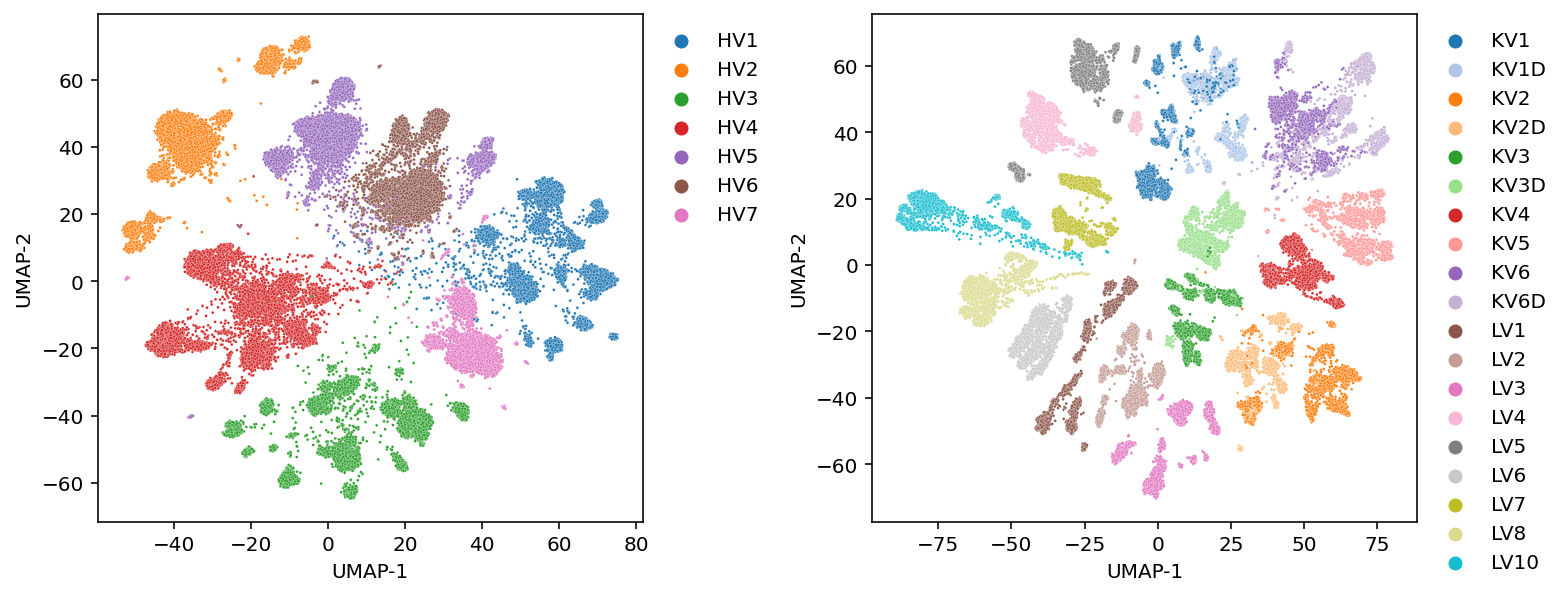

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(11, 4.5))
ax = sns.scatterplot(
    data=heavy_umap,
    x='UMAP-1',
    y='UMAP-2',
    hue='v_gene_family',
    palette=HEAVY_GERMLINE_COLORS,
    hue_order=HEAVY_GERMLINES,
    s=2,
    ax=axes[0]
);
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=False);
ax = sns.scatterplot(
    data=light_umap,
    x='UMAP-1',
    y='UMAP-2',
    hue='v_gene_family',
    palette=LIGHT_GERMLINE_COLORS,
    hue_order=LIGHT_GERMLINES,
    s=2,
    ax=axes[1]
);
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=False);
fig.tight_layout();

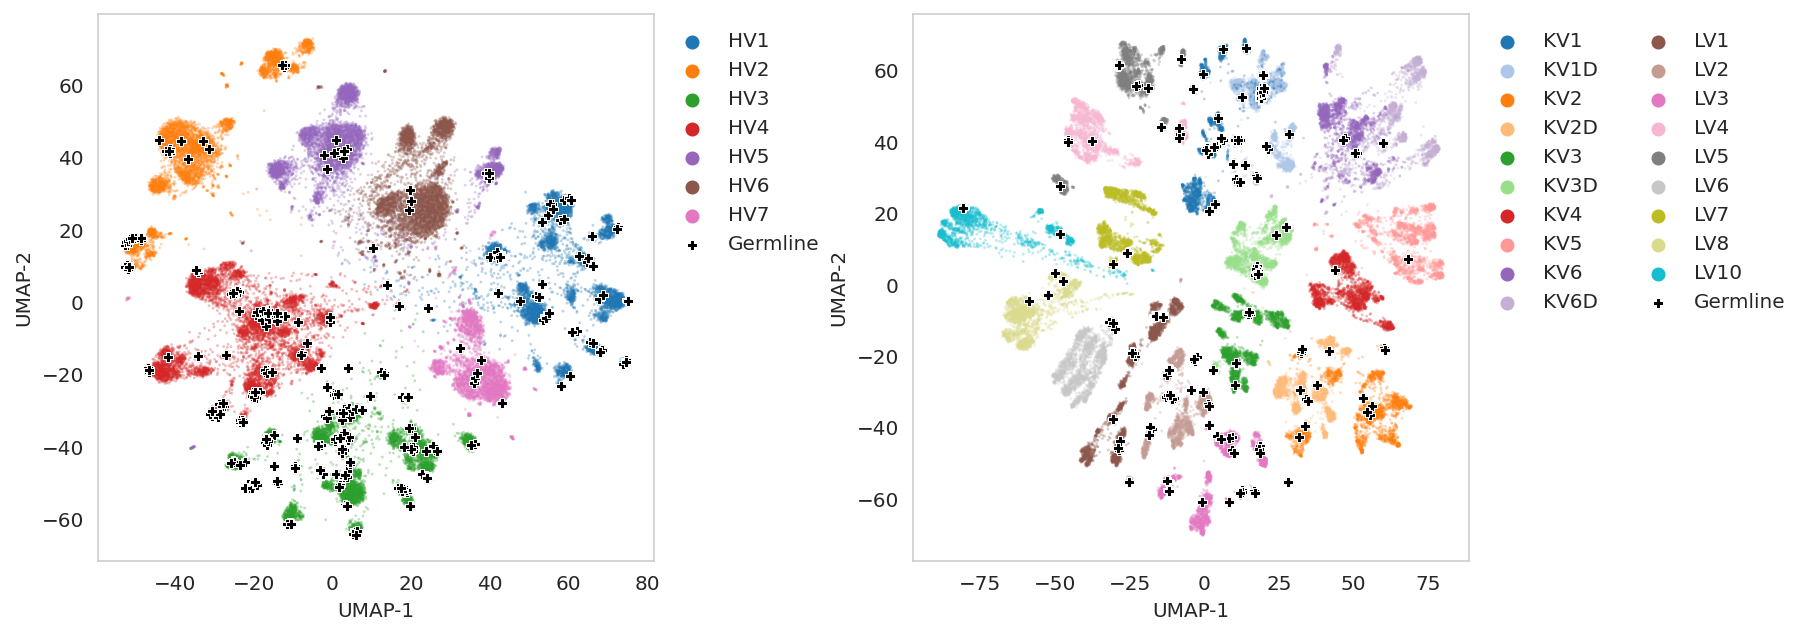

In [10]:
with sns.axes_style('whitegrid'):
    plt.rcParams["axes.grid"] = False
    fig, axes = plt.subplots(1, 2, figsize=(12.5, 4.5))
    ax = sns.scatterplot(
        data=heavy_umap,
        x='UMAP-1',
        y='UMAP-2',
        hue='v_gene_family',
        palette=HEAVY_GERMLINE_COLORS,
        hue_order=HEAVY_GERMLINES,
        s=2,
        linewidth=0,
        alpha=0.3,
        ax=axes[0]
    );
    ax = sns.scatterplot(
        data=light_umap,
        x='UMAP-1',
        y='UMAP-2',
        hue='v_gene_family',
        palette=LIGHT_GERMLINE_COLORS,
        hue_order=LIGHT_GERMLINES,
        s=2,
        linewidth=0,
        alpha=0.3,
        ax=axes[1]
    );

    ax = sns.scatterplot(
        data=heavy_umap[heavy_umap['subject'] == 'germline'],
        x='UMAP-1',
        y='UMAP-2',
        s=30,
        color='black',
        marker='P',
        linewidth=0.5,
        label='Germline',
        ax=axes[0]
    );
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=False);

    ax = sns.scatterplot(
        data=light_umap[light_umap['subject'] == 'germline'],
        x='UMAP-1',
        y='UMAP-2',
        s=30,
        color='black',
        marker='P',
        linewidth=0.5,
        label='Germline',
        ax=axes[1]
    );
    ax.legend(loc='upper left', ncol=2, bbox_to_anchor=(1, 1), frameon=False);
    fig.tight_layout();


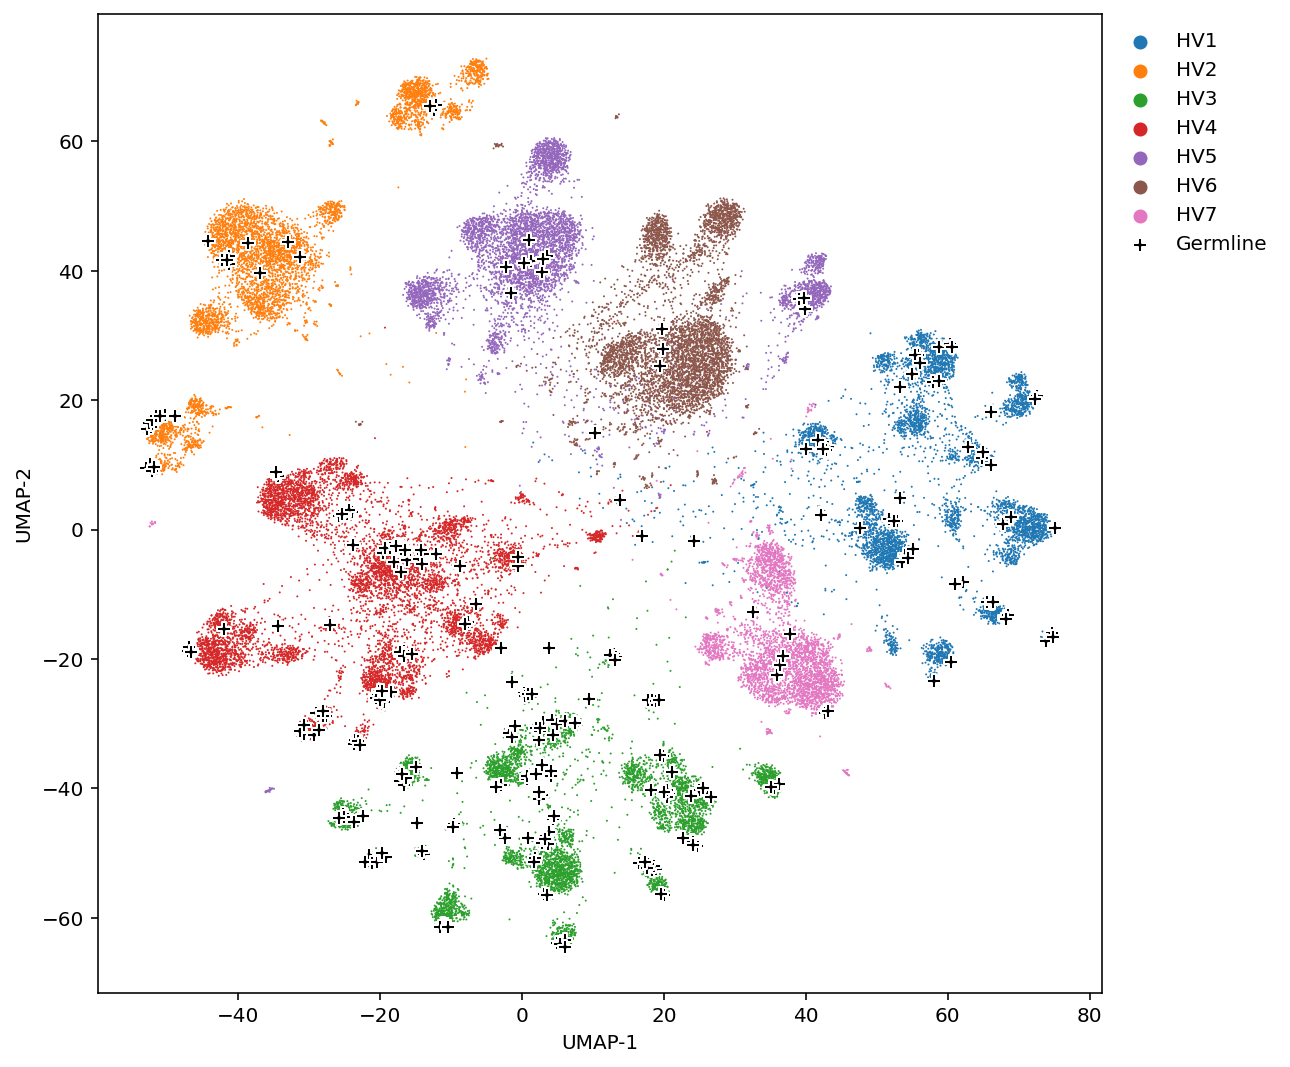

In [11]:
fig, ax = plt.subplots(figsize=(9, 9))
ax = sns.scatterplot(
    data=heavy_umap,
    x='UMAP-1',
    y='UMAP-2',
    hue='v_gene_family',
    palette=HEAVY_GERMLINE_COLORS,
    hue_order=HEAVY_GERMLINES,
    s=1,
    linewidth=0,
    alpha=1,
    ax=ax
);
ax = sns.scatterplot(
    data=heavy_umap[heavy_umap['subject'] == 'germline'],
    x='UMAP-1',
    y='UMAP-2',
    s=50,
    color='black',
    marker='P',
    linewidth=1,
    label='Germline',
    ax=ax
);
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=False);

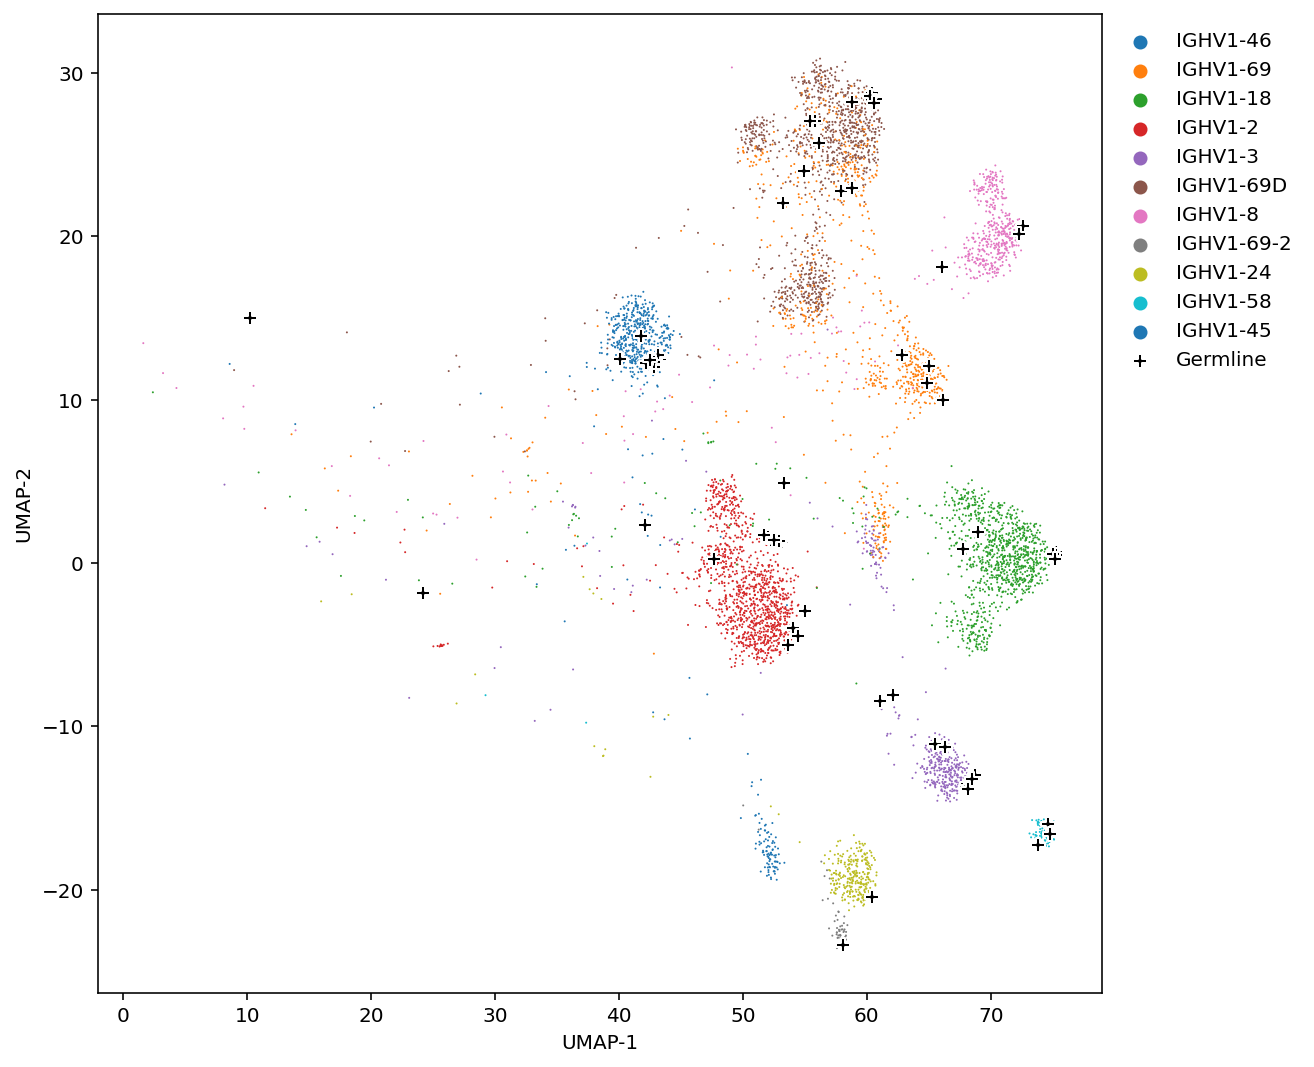

In [12]:
umap = heavy_umap[heavy_umap['v_gene_family'] == 'HV1']
fig, ax = plt.subplots(figsize=(9, 9))
data = umap[umap['subject'] != 'germline']
ax = sns.scatterplot(
    data=data,
    x='UMAP-1',
    y='UMAP-2',
    hue=data['v_gene'].apply(lambda s: s.split('*')[0]),
    palette='tab10',
    s=1,
    linewidth=0,
    alpha=1,
    ax=ax
);
ax = sns.scatterplot(
    data=umap[umap['subject'] == 'germline'],
    x='UMAP-1',
    y='UMAP-2',
    s=50,
    color='black',
    marker='P',
    linewidth=1,
    label='Germline',
    ax=ax
);
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=False);

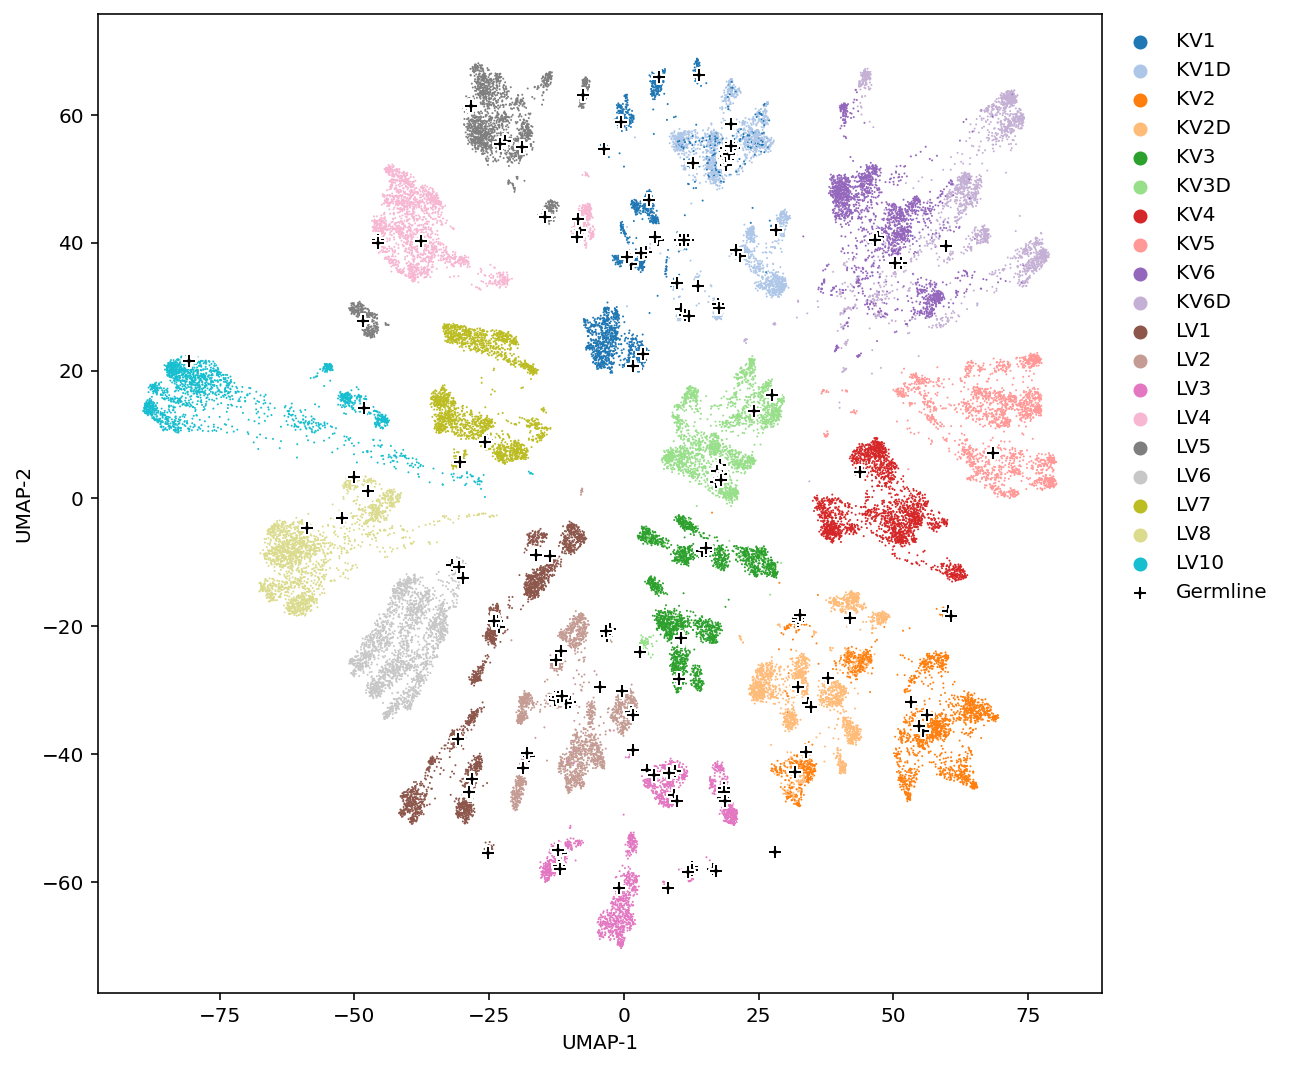

In [13]:
fig, ax = plt.subplots(figsize=(9, 9))
ax = sns.scatterplot(
    data=light_umap,
    x='UMAP-1',
    y='UMAP-2',
    hue='v_gene_family',
    palette=LIGHT_GERMLINE_COLORS,
    hue_order=LIGHT_GERMLINES,
    s=1,
    linewidth=0,
    alpha=1,
    ax=ax
);
ax = sns.scatterplot(
    data=light_umap[light_umap['subject'] == 'germline'],
    x='UMAP-1',
    y='UMAP-2',
    s=50,
    color='black',
    marker='P',
    linewidth=1,
    label='Germline',
    ax=ax
);
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=False);

In [14]:
# fig, axes = plt.subplots(1, 2, figsize=(11, 4.5))
ax = sns.scatterplot(
    data=heavy_umap,
    x='UMAP-1',
    y='UMAP-2',
    hue='subject',
    palette='tab20',
    s=2,
    #linewidth=0,
    #alpha=0.2,
    ax=axes[0]
);
ax.legend().remove();
ax = sns.scatterplot(
    data=light_umap,
    x='UMAP-1',
    y='UMAP-2',
    hue='subject',
    palette='tab20',
    s=2,
    ax=axes[1]
);
ax.legend().remove();
fig.tight_layout();

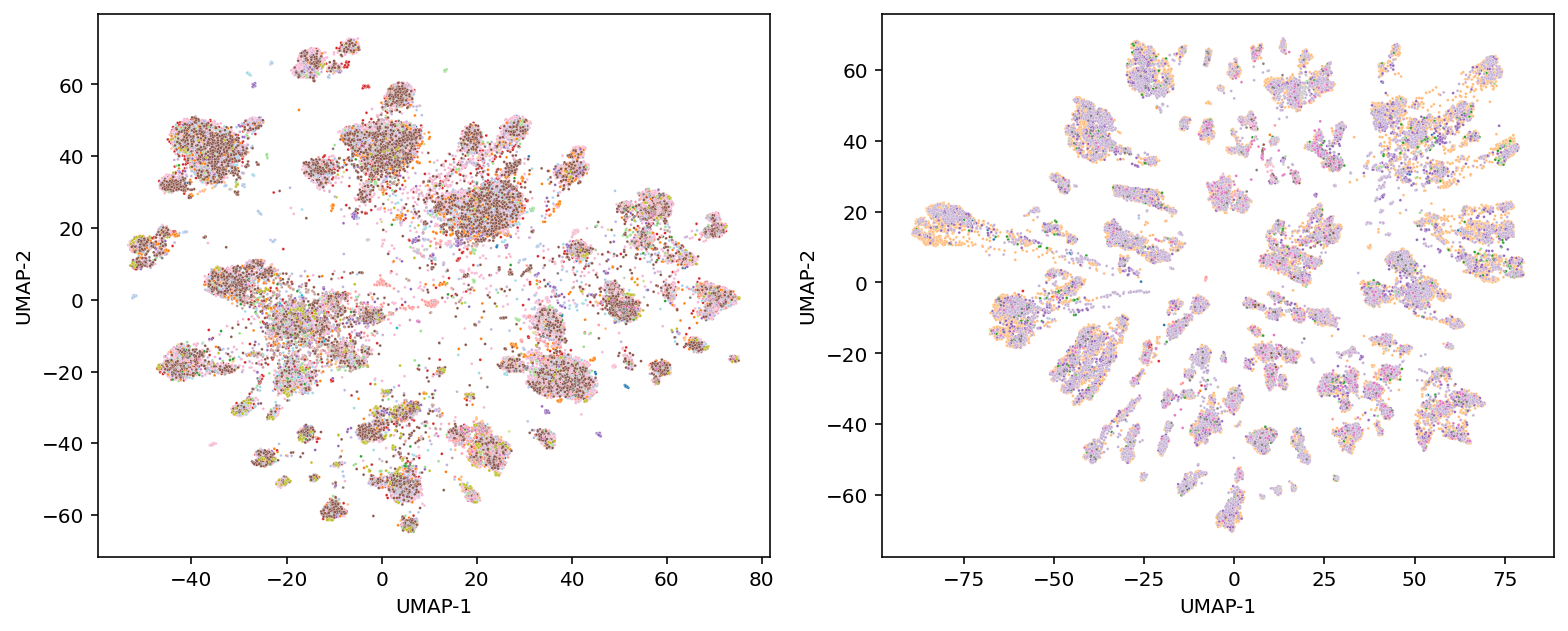

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(11, 4.5))
ax = sns.scatterplot(
    data=heavy_umap,
    x='UMAP-1',
    y='UMAP-2',
    hue='study_path',
    palette='tab20',
    s=2,
    #linewidth=0,
    #alpha=0.2,
    ax=axes[0]
);
ax.legend().remove();
ax = sns.scatterplot(
    data=light_umap,
    x='UMAP-1',
    y='UMAP-2',
    hue='study_path',
    palette='tab20',
    s=2,
    ax=axes[1]
);
ax.legend().remove();
fig.tight_layout();

# Peptide diversity

In [16]:
heavy_prevalence = pd.read_csv('../../data/oas_stats/subject_similarity/heavy_prevalence.tsv', sep='\t', index_col=0)['peptides']
heavy_prevalence.head()

subjects
1    185630002
2     20866433
3      7850697
4      4104928
5      2544338
Name: peptides, dtype: int64

In [17]:
light_prevalence = pd.read_csv('../../data/oas_stats/subject_similarity/light_prevalence.tsv', sep='\t', index_col=0)['peptides']
light_prevalence.head()

subjects
1    68608383
2    10267313
3     4167207
4     2294572
5     1465382
Name: peptides, dtype: int64

In [18]:
def get_percentual_cumulative_prevalence(counts):
    # counts = dictionary { number of subjects -> number of unique peptides found in given number of subjects }
    # returns series { percentage of subjects -> number of unique peptides found in AT LEAST given number of subjects}
    counts = pd.Series(counts).sort_index()
    num_subjects = max(counts.index)
    print(f'Normalizing to {num_subjects} subjects')
    percentage = (counts.index / num_subjects).map(lambda v: f'{int(v*100)}%').values
    counts = counts.groupby(percentage).sum().reindex([f'{v}%' for v in range(0, 101)], fill_value=0).astype('int')
    counts = counts[::-1].cumsum()[::-1]
    return counts

In [19]:
heavy_prevalence_percent = get_percentual_cumulative_prevalence(heavy_prevalence)
heavy_prevalence_percent

Normalizing to 225 subjects


0%      231738302
1%       25241867
2%       13286242
3%        9006605
4%        6780556
          ...    
96%         11823
97%          7607
98%          4049
99%          2035
100%          860
Name: peptides, Length: 101, dtype: int64

In [20]:
light_prevalence_percent = get_percentual_cumulative_prevalence(light_prevalence)
light_prevalence_percent

Normalizing to 154 subjects


0%      93407007
1%      24798624
2%      10364104
3%       8069532
4%       5579134
          ...   
96%        16721
97%         8550
98%         5712
99%          305
100%          94
Name: peptides, Length: 101, dtype: int64

In [21]:
prevalence_percent = heavy_prevalence_percent + light_prevalence_percent
prevalence_percent

0%      325145309
1%       50040491
2%       23650346
3%       17076137
4%       12359690
          ...    
96%         28544
97%         16157
98%          9761
99%          2340
100%          954
Name: peptides, Length: 101, dtype: int64

In [22]:
def chop_seq_peptides(seq, peptide_length):
    left = int(peptide_length/2)
    right = int(np.ceil(peptide_length/2))
    return [seq[center - left:center + right] for center in range(left, len(seq) - right + 1)]

In [23]:
!grep ">" ../../data/germlines/imgt_human_variable_germlines.fa | cut -d'|' -f2 | cut -c1-4 | sort | uniq -c

  60 IGHD
  13 IGHJ
 406 IGHV
   9 IGKJ
 108 IGKV
  12 IGLJ
  98 IGLV


In [24]:
germline_peptides = set(peptide for r in SeqIO.parse('../../data/germlines/imgt_human_variable_germlines.fa', 'fasta') 
                        for peptide in chop_seq_peptides(str(r.seq).replace('.',''), 9))
len(germline_peptides)

12574

In [25]:
print('{:,}'.format(prevalence_percent.loc['80%']))

156,181


In [26]:
print('{:,}'.format(prevalence_percent.loc['80%'] / len(germline_peptides)))

12.420947987911564


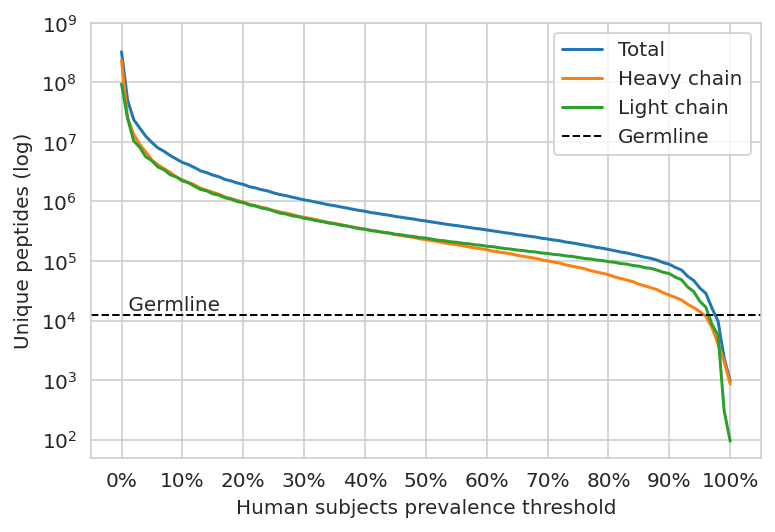

In [27]:
with sns.axes_style('whitegrid'):
    ax = prevalence_percent.plot(figsize=(6, 4), label='Total', lw=1.5);
    heavy_prevalence_percent.plot(ax=ax, label='Heavy chain', lw=1.5);
    light_prevalence_percent.plot(ax=ax, label='Light chain', lw=1.5);
    ax.set_xlabel('Human subjects prevalence threshold')
    ax.set_ylabel('Unique peptides (log)');
    ax.set_yscale('log');
    ax.axhline(len(germline_peptides), ls='--', color='black', lw=1, label='Germline')
    ax.text(0, len(germline_peptides)+2000, ' Germline')
    ax.set_ylim(50, 1e9)
    ax.set_yticks(10 ** np.arange(2, 10))
    xticks = list(range(0, 101, 10))
    ax.set_xticks(xticks)
    ax.set_xticklabels(prevalence_percent.index[xticks])
    ax.legend();

In [28]:
import itertools

def flip(items, ncol):
    return itertools.chain(*[items[i::ncol] for i in range(ncol)])


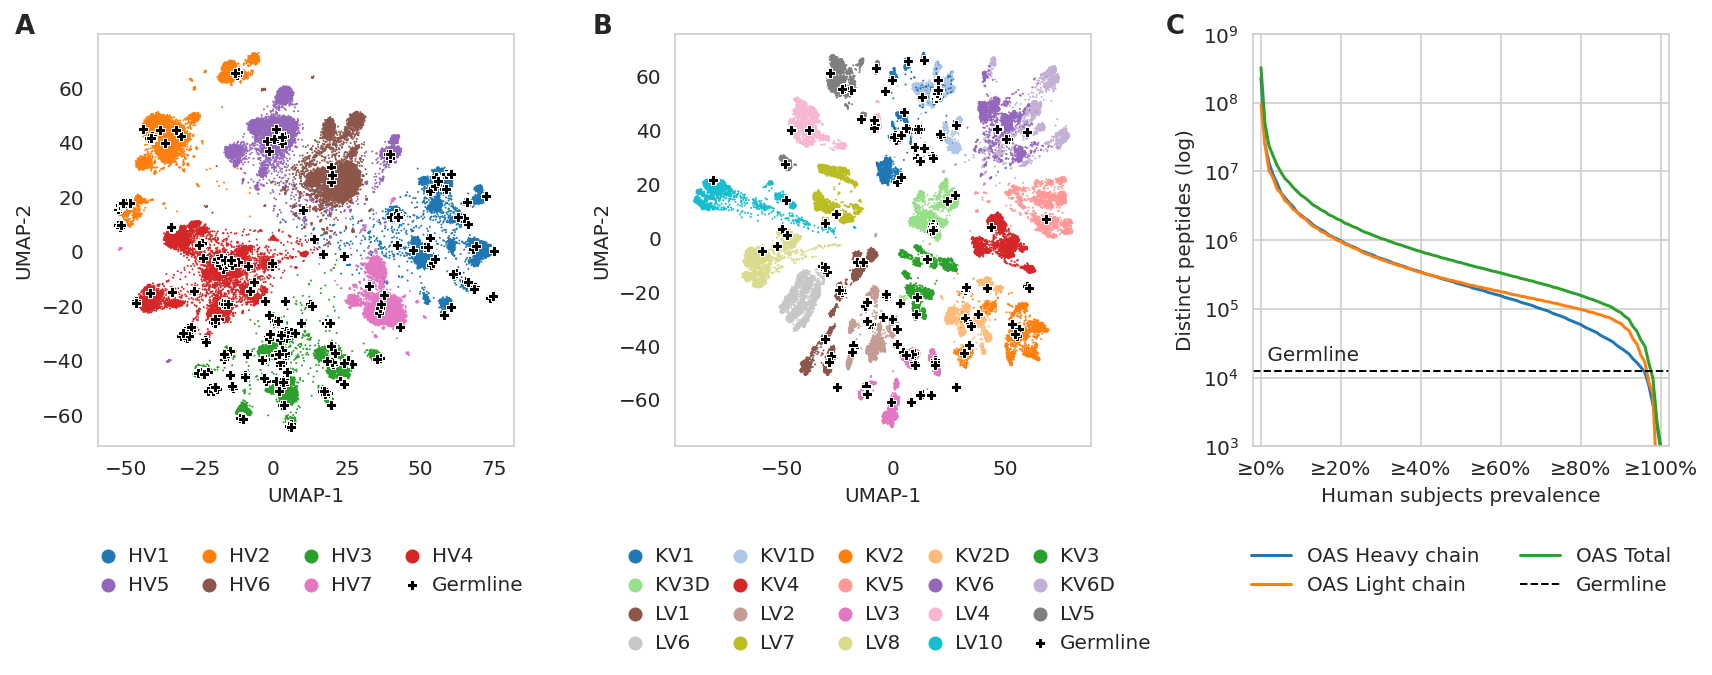

In [43]:
with sns.axes_style('whitegrid', rc={'font.family': 'DejaVu Sans'}):
    fig, axes = plt.subplots(1, 3, figsize=(12, 5.0))
    
    sns.scatterplot(
        data=heavy_umap,
        x='UMAP-1',
        y='UMAP-2',
        hue='v_gene_family',
        palette=HEAVY_GERMLINE_COLORS,
        hue_order=HEAVY_GERMLINES,
        s=1,
        linewidth=0,
        ax=axes[0]
    );
    sns.scatterplot(
        data=light_umap,
        x='UMAP-1',
        y='UMAP-2',
        hue='v_gene_family',
        palette=LIGHT_GERMLINE_COLORS,
        hue_order=LIGHT_GERMLINES,
        s=1,
        linewidth=0,
        ax=axes[1]
    );

    ax = sns.scatterplot(
        data=heavy_umap[heavy_umap['subject'] == 'germline'],
        x='UMAP-1',
        y='UMAP-2',
        s=30,
        color='black',
        marker='P',
        linewidth=0.5,
        #alpha=0.2,
        label='Germline',
        ax=axes[0]
    );
    ax.grid(False);
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(flip(handles, 4), flip(labels, 4), 
              loc='upper center', ncol=4, bbox_to_anchor=(0.5, -0.2), frameon=False, columnspacing=1, handletextpad=0);
    ax.text(-0.20, 1, 'A', fontweight='bold', fontsize=13, transform=ax.transAxes)

    ax = sns.scatterplot(
        data=light_umap[light_umap['subject'] == 'germline'],
        x='UMAP-1',
        y='UMAP-2',
        s=30,
        color='black',
        marker='P',
        linewidth=0.5,
        label='Germline',
        ax=axes[1]
    );
    ax.grid(False);
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(flip(handles, 5), flip(labels, 5), 
              loc='upper center', ncol=5, bbox_to_anchor=(0.5, -0.2), frameon=False, columnspacing=0.5, handletextpad=0);
    ax.text(-0.20, 1, 'B', fontweight='bold', fontsize=13, transform=ax.transAxes)

    
    ax = axes[2]
    heavy_prevalence_percent.plot(ax=ax, label='OAS Heavy chain', lw=1.5);
    light_prevalence_percent.plot(ax=ax, label='OAS Light chain', lw=1.5);
    prevalence_percent.plot(label='OAS Total', lw=1.5, ax=ax);
    ax.set_xlabel('Human subjects prevalence')
    ax.set_ylabel('Distinct peptides (log)');
    ax.set_yscale('log');
    ax.axhline(len(germline_peptides), ls='--', color='black', lw=1, label='Germline')
    ax.text(0, len(germline_peptides)+5000, ' Germline')
    ax.set_ylim(1000, 1e9)
    ax.set_xlim(-2, 102)
    ax.set_yticks(10 ** np.arange(3, 10))
    xticks = list(range(0, 101, 20))
    ax.set_xticks(xticks)
    ax.set_xticklabels([f'≥{v}' for v in prevalence_percent.index[xticks]])
    ax.legend(loc='upper center', ncol=2, bbox_to_anchor=(0.5, -0.2), frameon=False);
    ax.text(-0.21, 1, 'C', fontweight='bold', fontsize=13, transform=ax.transAxes)
    
    fig.tight_layout(w_pad=0);
    fig.savefig('../../data/figures/main/fig2.png', dpi=300, backend='agg', bbox_inches='tight')


In [30]:
'{:,}'.format(prevalence_percent.loc['20%'])

'1,932,622'

# Subject similarity

In [31]:
subjects = pd.read_csv('../../data/oas_stats/subject_similarity/subjects.tsv', sep='\t', index_col='Subject')
subjects.head(3)

Index  HeavyPeptides  LightPeptides  HeavySeqs  \
Subject                                                                 
Bernat_2019:A007           1        2696574        1426135     423912   
Bhiman_2015:CAP256         2         362985         235310      73793   
Bonsignori_2016:CH505      3         911389              0      58841   

                       LightSeqs  CompleteHeavySeqs  CompleteLightSeqs  \
Subject                                                                  
Bernat_2019:A007          315778             390689             303913   
Bhiman_2015:CAP256        114088              64256             108444   
Bonsignori_2016:CH505          0              20507                  0   

                             StudyPath                     Author  \
Subject                                                             
Bernat_2019:A007           Bernat_2019      Bernat et al., (2019)   
Bhiman_2015:CAP256         Bhiman_2015      Bhiman et al., (2015)   
Bonsignori_2016:CH505  Bonsignori_2016  Bonsignori et al., (2016)   

                                                                    Link  \
Subject                                                                    
Bernat_2019:A007       https://www.frontiersin.org/articles/10.3389/f...   
Bhiman_2015:CAP256          https://www.ncbi.nlm.nih.gov/pubmed/26457756   
Bonsignori_2016:CH505         https://doi.org/10.1016/j.cell.2016.02.022   

                       Year Age    Disease Vaccine  \
Subject                                              
Bernat_2019:A007       2019  no        NaN     NaN   
Bhiman_2015:CAP256     2015  no        HIV     NaN   
Bonsignori_2016:CH505  2016  no  HIV, None     NaN   

                                            Isotype  \
Subject                                               
Bernat_2019:A007             Bulk, IGHM, IGHG, IGHA   
Bhiman_2015:CAP256     Bulk, IGHG, IGHA, IGHM, IGHE   
Bonsignori_2016:CH505  Bulk, IGHE, IGHG, IGHD, IGHM   

                                                  BType BSource Processed  
Subject                                                                    
Bernat_2019:A007                       Unsorted-B-Cells    PBMC        no  
Bhiman_2015:CAP256                     Unsorted-B-Cells    PBMC       NaN  
Bonsignori_2016:CH505  Unsorted-B-Cells, Memory-B-Cells    PBMC       NaN

In [32]:
subjects[subjects['StudyPath'].str.startswith('Corco')]

Index  HeavyPeptides  LightPeptides  HeavySeqs  LightSeqs  \
Subject                                                                       
Corcoran_2016:H1      4        3141354              0     457247          0   

                  CompleteHeavySeqs  CompleteLightSeqs      StudyPath  \
Subject                                                                 
Corcoran_2016:H1             447879                  0  Corcoran_2016   

                                   Author  \
Subject                                     
Corcoran_2016:H1  Corcoran et al., (2016)   

                                                    Link  Year Age Disease  \
Subject                                                                      
Corcoran_2016:H1  https://dx.doi.org/10.1038/ncomms13642  2016  no     NaN   

                 Vaccine                             Isotype  \
Subject                                                        
Corcoran_2016:H1     NaN  Bulk, IGHG, IGHA, IGHD, IGHM, IGHE   

                             BType BSource Processed  
Subject                                               
Corcoran_2016:H1  Unsorted-B-Cells    PBMC       NaN

In [33]:
print('OASis contains {:,} subjects from {:,} studies'.format(len(subjects), subjects['StudyPath'].nunique()))

OASis contains 231 subjects from 26 studies


In [34]:
subject_by_hl = subjects[['CompleteHeavySeqs','CompleteLightSeqs']] >= 10000
subject_by_hl['CompleteHeavyAndLightSeqs'] = subject_by_hl.sum(axis=1) == 2
subject_by_hl.sum()

CompleteHeavySeqs            225
CompleteLightSeqs            154
CompleteHeavyAndLightSeqs    148
dtype: int64

In [35]:
print('{:,} redundant sequences in OASis'.format(subjects[['HeavySeqs','LightSeqs']].sum(axis=1).sum()))

152,114,239 redundant sequences in OASis


In [36]:
heavy_intersection = pd.read_csv('../../data/oas_stats/subject_similarity/heavy_intersection.tsv', sep='\t', index_col=0)
heavy_intersection.head(3)

Bernat_2019:A007  Bhiman_2015:CAP256  \
Subject                                                       
Bernat_2019:A007                2696574              108092   
Bhiman_2015:CAP256               108092              362985   
Bonsignori_2016:CH505            206420               76616   

                       Bonsignori_2016:CH505  Corcoran_2016:H1  \
Subject                                                          
Bernat_2019:A007                      206420            453190   
Bhiman_2015:CAP256                     76616             96976   
Bonsignori_2016:CH505                 911389            206008   

                       Doria-Rose_2015:CAP256  Eliyahu_2018:C10  \
Subject                                                           
Bernat_2019:A007                       294323            111755   
Bhiman_2015:CAP256                     125178             41593   
Bonsignori_2016:CH505                  208098             91451   

                       Eliyahu_2018:C4  Eliyahu_2018:C6  Eliyahu_2018:C7  \
Subject                                                                    
Bernat_2019:A007                102918            85077           118312   
Bhiman_2015:CAP256               38984            33173            45751   
Bonsignori_2016:CH505            83918            67807            91909   

                       Eliyahu_2018:C9  ...  Waltari_2018:MT1214  \
Subject                                 ...                        
Bernat_2019:A007                107450  ...               641436   
Bhiman_2015:CAP256               40856  ...               130028   
Bonsignori_2016:CH505            85983  ...               290036   

                       Waltari_2018:MT8004  Wu_2011:Donor-74  \
Subject                                                        
Bernat_2019:A007                    643234            128528   
Bhiman_2015:CAP256                  133988             32069   
Bonsignori_2016:CH505               307455             91142   

                       Wu_2015:Donor-45  Zhou_2015:Donor-44  \
Subject                                                       
Bernat_2019:A007                 309793              126806   
Bhiman_2015:CAP256                65584               34091   
Bonsignori_2016:CH505            191089               82061   

                       Zhou_2015:Donor-C38  Zhou_2015:Donor-RU01  \
Subject                                                            
Bernat_2019:A007                    115932                105357   
Bhiman_2015:CAP256                   71723                 29012   
Bonsignori_2016:CH505                81906                 71288   

                       Zhou_2015:Donor-RU08  Zhu_2012:Donor-39  \
Subject                                                          
Bernat_2019:A007                      97800             138489   
Bhiman_2015:CAP256                    27223              48195   
Bonsignori_2016:CH505                 67461             111979   

                       Zhu_2013:Donor-C38  
Subject                                    
Bernat_2019:A007                   335629  
Bhiman_2015:CAP256                  93964  
Bonsignori_2016:CH505              221192  

[3 rows x 225 columns]

In [37]:
light_intersection = pd.read_csv('../../data/oas_stats/subject_similarity/light_intersection.tsv', sep='\t', index_col=0)
light_intersection.head(3)

Bernat_2019:A007  Bhiman_2015:CAP256  \
Subject                                                        
Bernat_2019:A007                 1426135               91375   
Bhiman_2015:CAP256                 91375              235310   
Doria-Rose_2015:CAP256            329956              148691   

                        Doria-Rose_2015:CAP256  Gidoni_2019:S1  \
Subject                                                          
Bernat_2019:A007                        329956          155478   
Bhiman_2015:CAP256                      148691           43006   
Doria-Rose_2015:CAP256                 1373970          135175   

                        Gidoni_2019:S10  Gidoni_2019:S100  Gidoni_2019:S11  \
Subject                                                                      
Bernat_2019:A007                 232889            202466           199545   
Bhiman_2015:CAP256                53667             42356            44087   
Doria-Rose_2015:CAP256           179017            147048           149569   

                        Gidoni_2019:S12  Gidoni_2019:S13  Gidoni_2019:S14  \
Subject                                                                     
Bernat_2019:A007                 218150           221199           181612   
Bhiman_2015:CAP256                47512            47539            37679   
Doria-Rose_2015:CAP256           164340           163029           130762   

                        ...  Waltari_2018:MT8004  Wu_2011:Donor-45  \
Subject                 ...                                          
Bernat_2019:A007        ...               681058             41864   
Bhiman_2015:CAP256      ...               144816              1133   
Doria-Rose_2015:CAP256  ...               655792             46063   

                        Wu_2015:Donor-45  Zhou_2013:Donor-IAVI23  \
Subject                                                            
Bernat_2019:A007                  196274                  112177   
Bhiman_2015:CAP256                  4968                   21256   
Doria-Rose_2015:CAP256            214817                  121892   

                        Zhou_2013:Donor-IAVI57  Zhou_2013:Donor-IAVI74  \
Subject                                                                  
Bernat_2019:A007                         88445                  169467   
Bhiman_2015:CAP256                        2571                   49077   
Doria-Rose_2015:CAP256                   93911                  196279   

                        Zhou_2013:Donor-NIAID45  Zhou_2013:Donor-RU3  \
Subject                                                                
Bernat_2019:A007                          55603               132640   
Bhiman_2015:CAP256                         1328                 3347   
Doria-Rose_2015:CAP256                    60349               145224   

                        Zhu_2012:Donor-39  Zhu_2013:Donor-C38  
Subject                                                        
Bernat_2019:A007                    83845              300384  
Bhiman_2015:CAP256                   2093               96738  
Doria-Rose_2015:CAP256              93163              382503  

[3 rows x 154 columns]

In [38]:
heavy_size = pd.Series(heavy_intersection.values[np.eye(*heavy_intersection.shape, dtype='bool')], heavy_intersection.index)
light_size = pd.Series(light_intersection.values[np.eye(*light_intersection.shape, dtype='bool')], light_intersection.index)

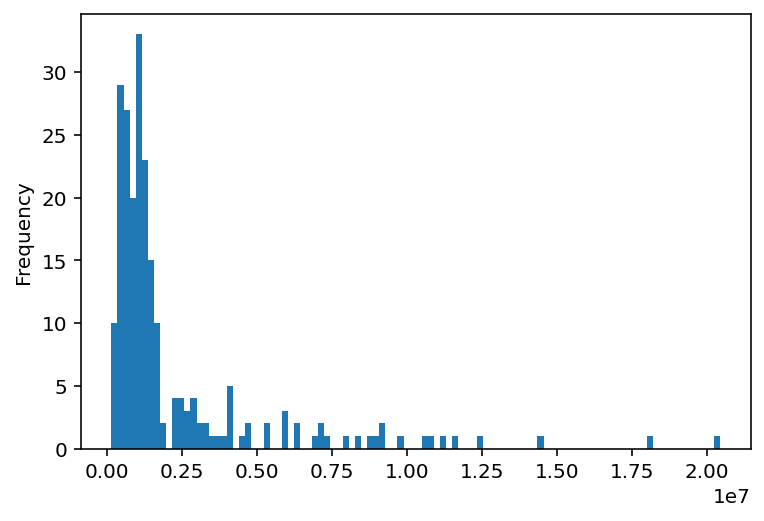

In [39]:
pd.Series(heavy_size).plot.hist(bins=100);

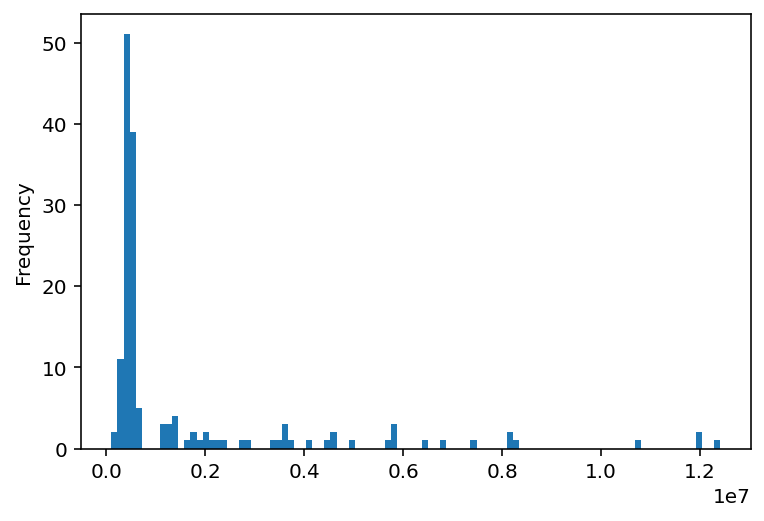

In [40]:
pd.Series(light_size).plot.hist(bins=100);

In [41]:
size_bins = {
    '100k-500k': 100000,
    '500k-1M': 500000,
    '1M-2M': 1000000,
    '2M-5M': 2000000,
    '5M-25M': 5000000
}

In [71]:
def get_bin(value, bins):
    for name in list(bins.keys())[::-1]:
        if value > bins[name]:
            return name
    raise ValueError(value)

In [72]:
heavy_size.apply(get_bin, bins=size_bins).value_counts().loc[size_bins.keys()]

100k-500k    33
500k-1M      61
1M-2M        75
2M-5M        30
5M-25M       26
dtype: int64

In [73]:
light_size.apply(get_bin, bins=size_bins).value_counts().loc[size_bins.keys()]

100k-500k    80
500k-1M      28
1M-2M        14
2M-5M        18
5M-25M       14
dtype: int64

In [74]:
heavy_union = (((-heavy_intersection) + heavy_size).T + heavy_size).T
heavy_union.head()

Bernat_2019:A007  Bhiman_2015:CAP256  \
Subject                                                        
Bernat_2019:A007                 2696574             2951467   
Bhiman_2015:CAP256               2951467              362985   
Bonsignori_2016:CH505            3401543             1197758   
Corcoran_2016:H1                 5384738             3407363   
Doria-Rose_2015:CAP256           3989221             1824777   

                        Bonsignori_2016:CH505  Corcoran_2016:H1  \
Subject                                                           
Bernat_2019:A007                      3401543           5384738   
Bhiman_2015:CAP256                    1197758           3407363   
Bonsignori_2016:CH505                  911389           3846735   
Corcoran_2016:H1                      3846735           3141354   
Doria-Rose_2015:CAP256                2290261           4443818   

                        Doria-Rose_2015:CAP256  Eliyahu_2018:C10  \
Subject                                                            
Bernat_2019:A007                       3989221           2959116   
Bhiman_2015:CAP256                     1824777            695689   
Bonsignori_2016:CH505                  2290261           1194235   
Corcoran_2016:H1                       4443818           3402222   
Doria-Rose_2015:CAP256                 1586970           1851859   

                        Eliyahu_2018:C4  Eliyahu_2018:C6  Eliyahu_2018:C7  \
Subject                                                                     
Bernat_2019:A007                2905043          2851895          2968110   
Bhiman_2015:CAP256               635388           570210           707082   
Bonsignori_2016:CH505           1138858          1083980          1209328   
Corcoran_2016:H1                3348752          3296454          3409328   
Doria-Rose_2015:CAP256          1802929          1749530          1867889   

                        Eliyahu_2018:C9  ...  Waltari_2018:MT1214  \
Subject                                  ...                        
Bernat_2019:A007                2937176  ...             13351665   
Bhiman_2015:CAP256               670181  ...             11529484   
Bonsignori_2016:CH505           1173458  ...             11917880   
Corcoran_2016:H1                3382186  ...             13757317   
Doria-Rose_2015:CAP256          1833498  ...             12429736   

                        Waltari_2018:MT8004  Wu_2011:Donor-74  \
Subject                                                         
Bernat_2019:A007                   12879664           3386967   
Bhiman_2015:CAP256                 11055321           1149837   
Bonsignori_2016:CH505              11430258           1639168   
Corcoran_2016:H1                   13295341           3812139   
Doria-Rose_2015:CAP256             11937842           2274825   

                        Wu_2015:Donor-45  Zhou_2015:Donor-44  \
Subject                                                        
Bernat_2019:A007                 6433694             3486098   
Bhiman_2015:CAP256               4344314             1245224   
Bonsignori_2016:CH505            4767213             1745658   
Corcoran_2016:H1                 6821418             3901910   
Doria-Rose_2015:CAP256           5349354             2386835   

                        Zhou_2015:Donor-C38  Zhou_2015:Donor-RU01  \
Subject                                                             
Bernat_2019:A007                    3024367               3244827   
Bhiman_2015:CAP256                   734987                987583   
Bonsignori_2016:CH505               1273208               1493711   
Corcoran_2016:H1                    3482413               3674668   
Doria-Rose_2015:CAP256              1916140               2147778   

                        Zhou_2015:Donor-RU08  Zhu_2012:Donor-39  \
Subject                                                           
Bernat_2019:A007                     3150351            3243009   
Bhiman_2015:CA

In [75]:
light_union = (((-light_intersection) + light_size).T + light_size).T
light_union.head()

Bernat_2019:A007  Bhiman_2015:CAP256  \
Subject                                                        
Bernat_2019:A007                 1426135             1570070   
Bhiman_2015:CAP256               1570070              235310   
Doria-Rose_2015:CAP256           2470149             1460589   
Gidoni_2019:S1                   1576579              498226   
Gidoni_2019:S10                  1778728              767125   

                        Doria-Rose_2015:CAP256  Gidoni_2019:S1  \
Subject                                                          
Bernat_2019:A007                       2470149         1576579   
Bhiman_2015:CAP256                     1460589          498226   
Doria-Rose_2015:CAP256                 1373970         1544717   
Gidoni_2019:S1                         1544717          305922   
Gidoni_2019:S10                        1780435          742039   

                        Gidoni_2019:S10  Gidoni_2019:S100  Gidoni_2019:S11  \
Subject                                                                      
Bernat_2019:A007                1778728           1705664          1706273   
Bhiman_2015:CAP256               767125            674949           670906   
Doria-Rose_2015:CAP256          1780435           1708917          1704084   
Gidoni_2019:S1                   742039            653665           648132   
Gidoni_2019:S10                  585482            866299           862003   

                        Gidoni_2019:S12  Gidoni_2019:S13  Gidoni_2019:S14  \
Subject                                                                     
Bernat_2019:A007                1741278          1766295          1677101   
Bhiman_2015:CAP256               721091           749130           630209   
Doria-Rose_2015:CAP256          1742923          1772300          1675786   
Gidoni_2019:S1                   694650           721835           615694   
Gidoni_2019:S10                  902248           925104           832522   

                        ...  Waltari_2018:MT8004  Wu_2011:Donor-45  \
Subject                 ...                                          
Bernat_2019:A007        ...             12756398           1484744   
Bhiman_2015:CAP256      ...             12101815            334650   
Doria-Rose_2015:CAP256  ...             12729499           1428380   
Gidoni_2019:S1          ...             12079807            381802   
Gidoni_2019:S10         ...             12206846            658313   

                        Wu_2015:Donor-45  Zhou_2013:Donor-IAVI23  \
Subject                                                            
Bernat_2019:A007                 2381147                 1602272   
Bhiman_2015:CAP256               1381628                  502368   
Doria-Rose_2015:CAP256           2310439                 1540392   
Gidoni_2019:S1                   1375761                  533245   
Gidoni_2019:S10                  1625029                  797966   

                        Zhou_2013:Donor-IAVI57  Zhou_2013:Donor-IAVI74  \
Subject                                                                  
Bernat_2019:A007                       1608736                 1707882   
Bhiman_2015:CAP256                      503785                  637447   
Doria-Rose_2015:CAP256                 1551105                 1628905   
Gidoni_2019:S1                          531972                  668794   
Gidoni_2019:S10                         800771                  928633   

                        Zhou_2013:Donor-NIAID45  Zhou_2013:Donor-RU3  \
Subject                                                                
Bernat_2019:A007                        1493286              1711010   
Bhiman_2015:CAP256                       356736               649478   
Doria-Rose_2015:CAP256                  1436375              1646261   
Gidoni_2019:S1                           393373               657766   
Gidoni_2019:S10                          668571               920745   

                        Zhu_2012:

In [76]:
heavy_iou = heavy_intersection / heavy_union
heavy_iou.head()

Bernat_2019:A007  Bhiman_2015:CAP256  \
Subject                                                        
Bernat_2019:A007                1.000000            0.036623   
Bhiman_2015:CAP256              0.036623            1.000000   
Bonsignori_2016:CH505           0.060684            0.063966   
Corcoran_2016:H1                0.084162            0.028461   
Doria-Rose_2015:CAP256          0.073780            0.068599   

                        Bonsignori_2016:CH505  Corcoran_2016:H1  \
Subject                                                           
Bernat_2019:A007                     0.060684          0.084162   
Bhiman_2015:CAP256                   0.063966          0.028461   
Bonsignori_2016:CH505                1.000000          0.053554   
Corcoran_2016:H1                     0.053554          1.000000   
Doria-Rose_2015:CAP256               0.090862          0.064023   

                        Doria-Rose_2015:CAP256  Eliyahu_2018:C10  \
Subject                                                            
Bernat_2019:A007                      0.073780          0.037766   
Bhiman_2015:CAP256                    0.068599          0.059787   
Bonsignori_2016:CH505                 0.090862          0.076577   
Corcoran_2016:H1                      0.064023          0.033340   
Doria-Rose_2015:CAP256                1.000000          0.059080   

                        Eliyahu_2018:C4  Eliyahu_2018:C6  Eliyahu_2018:C7  \
Subject                                                                     
Bernat_2019:A007               0.035427         0.029832         0.039861   
Bhiman_2015:CAP256             0.061355         0.058177         0.064704   
Bonsignori_2016:CH505          0.073686         0.062554         0.076000   
Corcoran_2016:H1               0.031053         0.025876         0.035747   
Doria-Rose_2015:CAP256         0.052929         0.044491         0.058317   

                        Eliyahu_2018:C9  ...  Waltari_2018:MT1214  \
Subject                                  ...                        
Bernat_2019:A007               0.036583  ...             0.048042   
Bhiman_2015:CAP256             0.060963  ...             0.011278   
Bonsignori_2016:CH505          0.073273  ...             0.024336   
Corcoran_2016:H1               0.031701  ...             0.049469   
Doria-Rose_2015:CAP256         0.055372  ...             0.036506   

                        Waltari_2018:MT8004  Wu_2011:Donor-74  \
Subject                                                         
Bernat_2019:A007                   0.049942          0.037948   
Bhiman_2015:CAP256                 0.012120          0.027890   
Bonsignori_2016:CH505              0.026898          0.055603   
Corcoran_2016:H1                   0.050569          0.038859   
Doria-Rose_2015:CAP256             0.039827          0.057616   

                        Wu_2015:Donor-45  Zhou_2015:Donor-44  \
Subject                                                        
Bernat_2019:A007                0.048152            0.036375   
Bhiman_2015:CAP256              0.015097            0.027377   
Bonsignori_2016:CH505           0.040084            0.047009   
Corcoran_2016:H1                0.053779            0.039922   
Doria-Rose_2015:CAP256          0.053189            0.048795   

                        Zhou_2015:Donor-C38  Zhou_2015:Donor-RU01  \
Subject                                                             
Bernat_2019:A007                   0.038333              0.032469   
Bhiman_2015:CAP256                 0.097584              0.029377   
Bonsignori_2016:CH505              0.064330              0.047725   
Corcoran_2016:H1                   0.029481              0.032737   
Doria-Rose_2015:CAP256             0.059784              0.043208   

                        Zhou_2015:Donor-RU08  Zhu_2012:Donor-39  \
Subject                                                           
Bernat_2019:A007                    0.031044           0.042704   
Bhiman_2015:CA

In [77]:
light_iou = light_intersection / light_union
light_iou.head()

Bernat_2019:A007  Bhiman_2015:CAP256  \
Subject                                                        
Bernat_2019:A007                1.000000            0.058198   
Bhiman_2015:CAP256              0.058198            1.000000   
Doria-Rose_2015:CAP256          0.133577            0.101802   
Gidoni_2019:S1                  0.098617            0.086318   
Gidoni_2019:S10                 0.130930            0.069959   

                        Doria-Rose_2015:CAP256  Gidoni_2019:S1  \
Subject                                                          
Bernat_2019:A007                      0.133577        0.098617   
Bhiman_2015:CAP256                    0.101802        0.086318   
Doria-Rose_2015:CAP256                1.000000        0.087508   
Gidoni_2019:S1                        0.087508        1.000000   
Gidoni_2019:S10                       0.100547        0.201290   

                        Gidoni_2019:S10  Gidoni_2019:S100  Gidoni_2019:S11  \
Subject                                                                      
Bernat_2019:A007               0.130930          0.118702         0.116948   
Bhiman_2015:CAP256             0.069959          0.062754         0.065713   
Doria-Rose_2015:CAP256         0.100547          0.086047         0.087771   
Gidoni_2019:S1                 0.201290          0.205383         0.212106   
Gidoni_2019:S10                1.000000          0.232227         0.235686   

                        Gidoni_2019:S12  Gidoni_2019:S13  Gidoni_2019:S14  \
Subject                                                                     
Bernat_2019:A007               0.125282         0.125233         0.108289   
Bhiman_2015:CAP256             0.065889         0.063459         0.059788   
Doria-Rose_2015:CAP256         0.094290         0.091987         0.078030   
Gidoni_2019:S1                 0.208112         0.201495         0.199459   
Gidoni_2019:S10                0.239986         0.239689         0.222863   

                        ...  Waltari_2018:MT8004  Wu_2011:Donor-45  \
Subject                 ...                                          
Bernat_2019:A007        ...             0.053390          0.028196   
Bhiman_2015:CAP256      ...             0.011966          0.003386   
Doria-Rose_2015:CAP256  ...             0.051518          0.032248   
Gidoni_2019:S1          ...             0.019656          0.064413   
Gidoni_2019:S10         ...             0.031946          0.041989   

                        Wu_2015:Donor-45  Zhou_2013:Donor-IAVI23  \
Subject                                                            
Bernat_2019:A007                0.082428                0.070011   
Bhiman_2015:CAP256              0.003596                0.042312   
Doria-Rose_2015:CAP256          0.092977                0.079131   
Gidoni_2019:S1                  0.059201                0.114377   
Gidoni_2019:S10                 0.068761                0.095029   

                        Zhou_2013:Donor-IAVI57  Zhou_2013:Donor-IAVI74  \
Subject                                                                  
Bernat_2019:A007                      0.054978                0.099226   
Bhiman_2015:CAP256                    0.005103                0.076990   
Doria-Rose_2015:CAP256                0.060545                0.120498   
Gidoni_2019:S1                        0.084583                0.132091   
Gidoni_2019:S10                       0.069629                0.116368   

                        Zhou_2013:Donor-NIAID45  Zhou_2013:Donor-RU3  \
Subject                                                                
Bernat_2019:A007                       0.037235             0.077521   
Bhiman_2015:CAP256                     0.003723             0.005153   
Doria-Rose_2015:CAP256                 0.042015             0.088214   
Gidoni_2019:S1                         0.089744             0.099839   
Gidoni_2019:S10                        0.059328             0.089332   

                        Zhu_2012:

/Users/prihodad/Documents/bioinformatics/projects/oas-humanization/condaenv/lib/python3.8/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


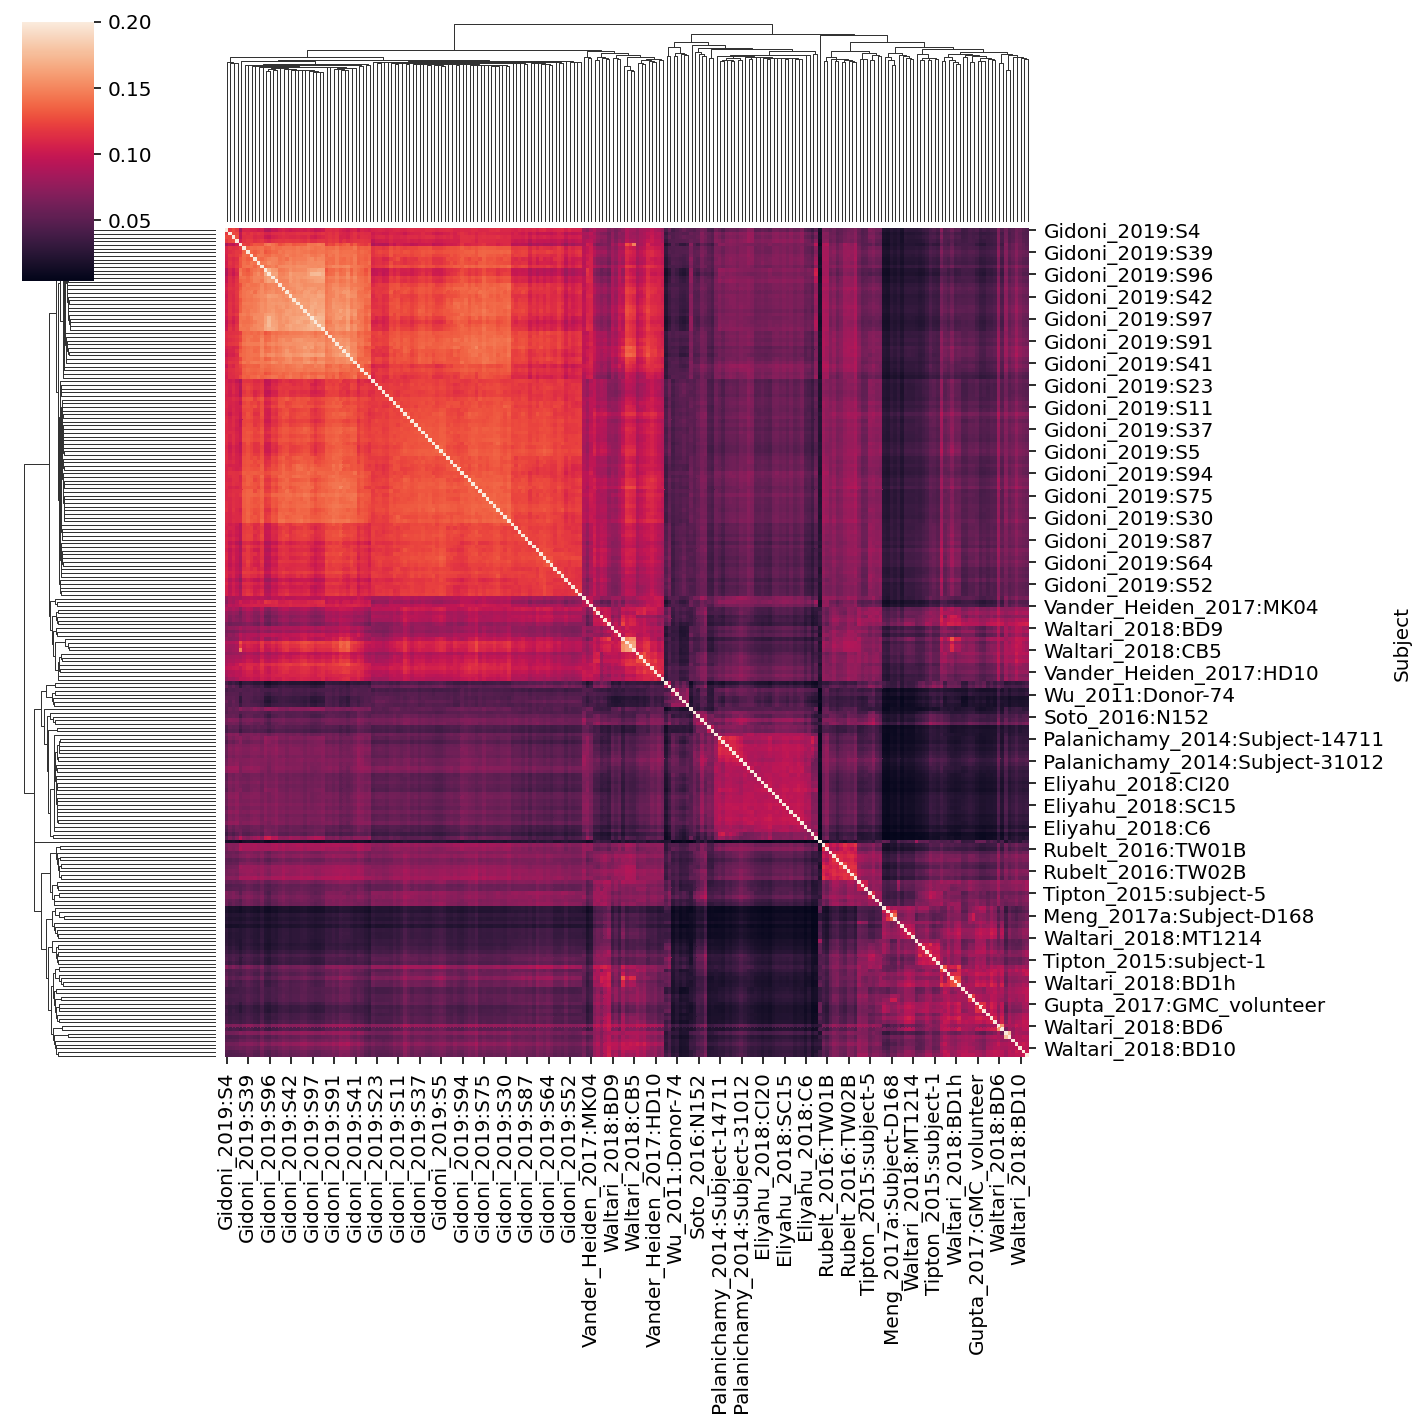

In [13]:
sns.clustermap(heavy_iou, vmax=0.2);

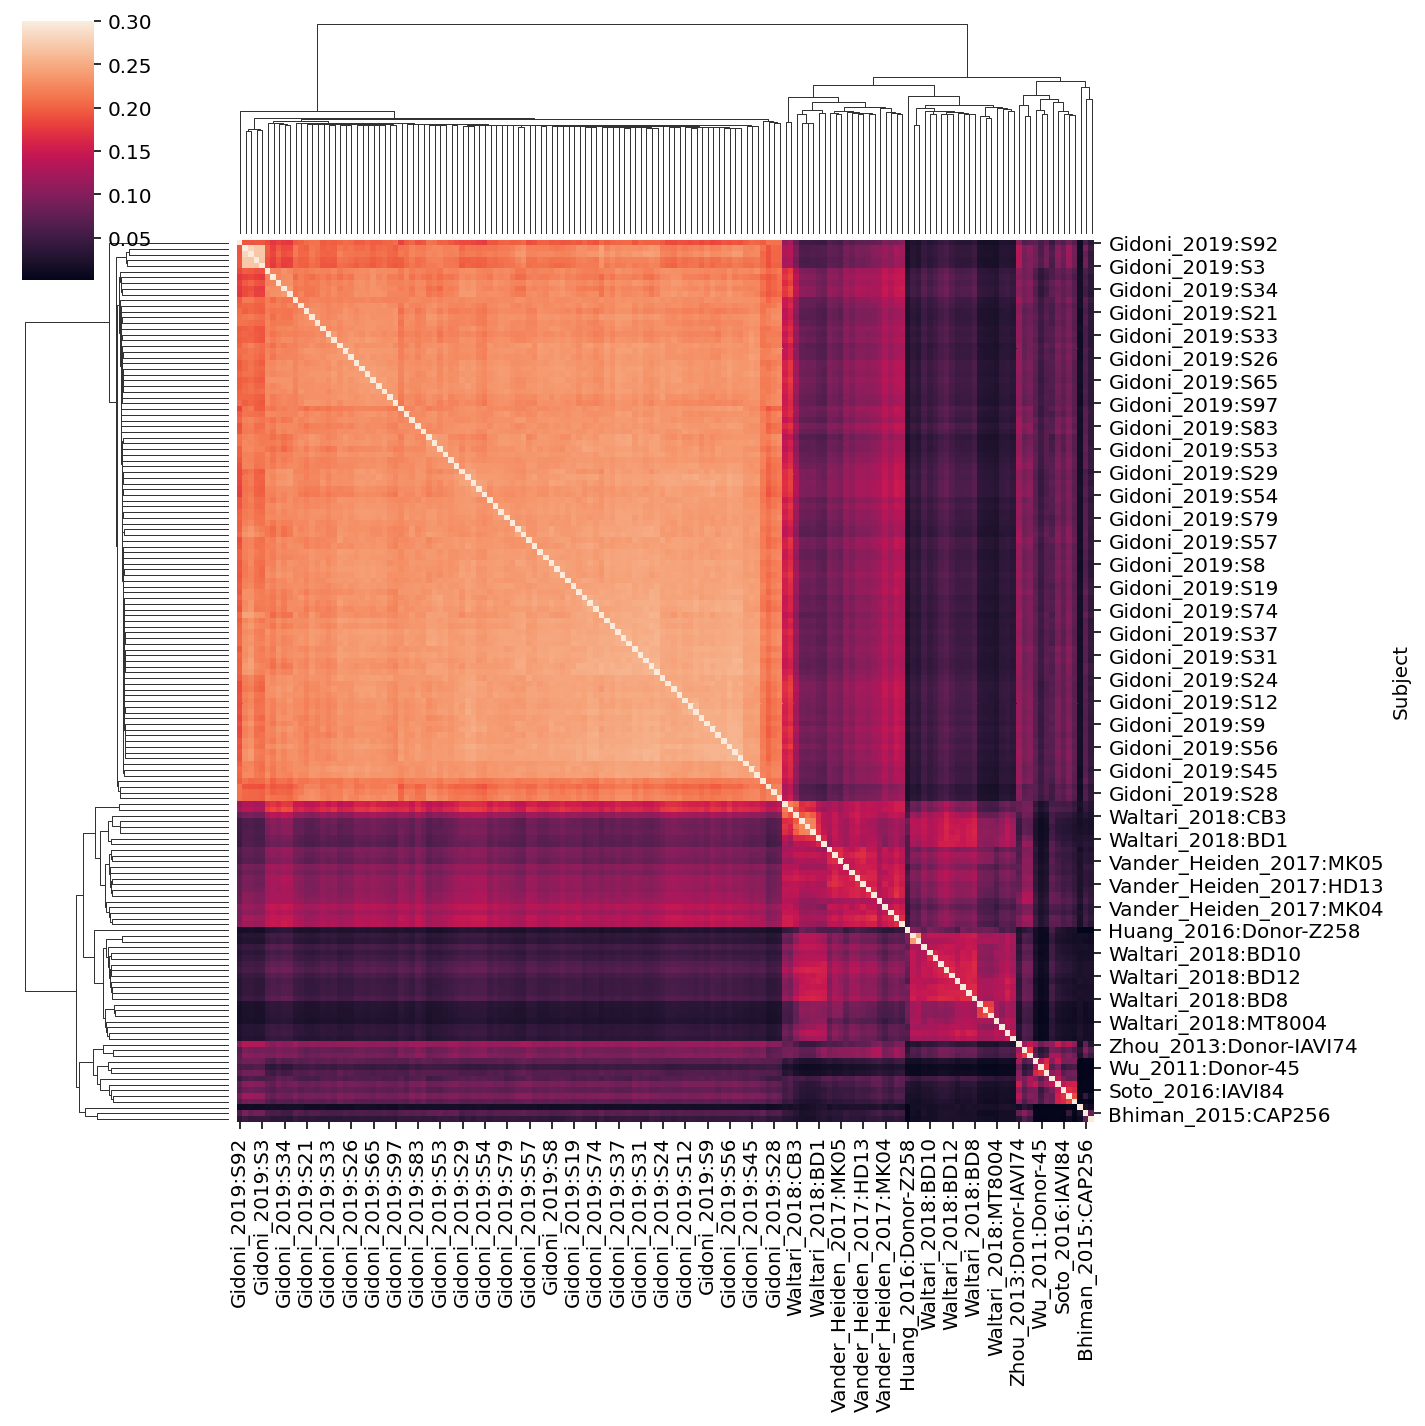

In [14]:
sns.clustermap(light_iou, vmax=0.3);

In [15]:
def agglomerative_clustering(distance, n_clusters, linkage='complete'):
    clusters = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage, affinity='precomputed').fit(distance).labels_
    return 'Cluster '+pd.Series(clusters+1, distance.index).astype(str)

In [16]:
heavy_clusters = agglomerative_clustering(1-heavy_iou, 8)
heavy_clusters.head()

Subject
Bernat_2019:A007          Cluster 4
Bhiman_2015:CAP256        Cluster 2
Bonsignori_2016:CH505     Cluster 2
Corcoran_2016:H1          Cluster 4
Doria-Rose_2015:CAP256    Cluster 2
dtype: object

In [17]:
heavy_clusters.value_counts()

Cluster 5    113
Cluster 1     30
Cluster 4     28
Cluster 8     27
Cluster 7     12
Cluster 3      7
Cluster 2      6
Cluster 6      2
dtype: int64

In [78]:
heavy_stacked = heavy_iou.stack().reset_index()
heavy_stacked.columns = ['A','B','Jaccard']
heavy_stacked = heavy_stacked[heavy_stacked['A'] != heavy_stacked['B']]
heavy_stacked['A_peptides'] = subjects.loc[heavy_stacked['A']]['HeavyPeptides'].values
heavy_stacked['B_peptides'] = subjects.loc[heavy_stacked['B']]['HeavyPeptides'].values
heavy_stacked['A_bin'] = heavy_stacked['A_peptides'].apply(get_bin, bins=size_bins) 
heavy_stacked['B_bin'] = heavy_stacked['B_peptides'].apply(get_bin, bins=size_bins) 
heavy_stacked['A_cluster'] = heavy_clusters.loc[heavy_stacked['A']].values
heavy_stacked['B_cluster'] = heavy_clusters.loc[heavy_stacked['B']].values
heavy_stacked['same_cluster'] = heavy_stacked['A_cluster'] == heavy_stacked['B_cluster']
heavy_stacked.head()

A                       B   Jaccard  A_peptides  B_peptides  \
1  Bernat_2019:A007      Bhiman_2015:CAP256  0.036623     2696574      362985   
2  Bernat_2019:A007   Bonsignori_2016:CH505  0.060684     2696574      911389   
3  Bernat_2019:A007        Corcoran_2016:H1  0.084162     2696574     3141354   
4  Bernat_2019:A007  Doria-Rose_2015:CAP256  0.073780     2696574     1586970   
5  Bernat_2019:A007        Eliyahu_2018:C10  0.037766     2696574      374297   

   A_bin      B_bin  A_cluster  B_cluster  same_cluster  
1  2M-5M  100k-500k  Cluster 4  Cluster 2         False  
2  2M-5M    500k-1M  Cluster 4  Cluster 2         False  
3  2M-5M      2M-5M  Cluster 4  Cluster 4          True  
4  2M-5M      1M-2M  Cluster 4  Cluster 2         False  
5  2M-5M  100k-500k  Cluster 4  Cluster 1         False

/Users/prihodad/Documents/bioinformatics/projects/oas-humanization/condaenv/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


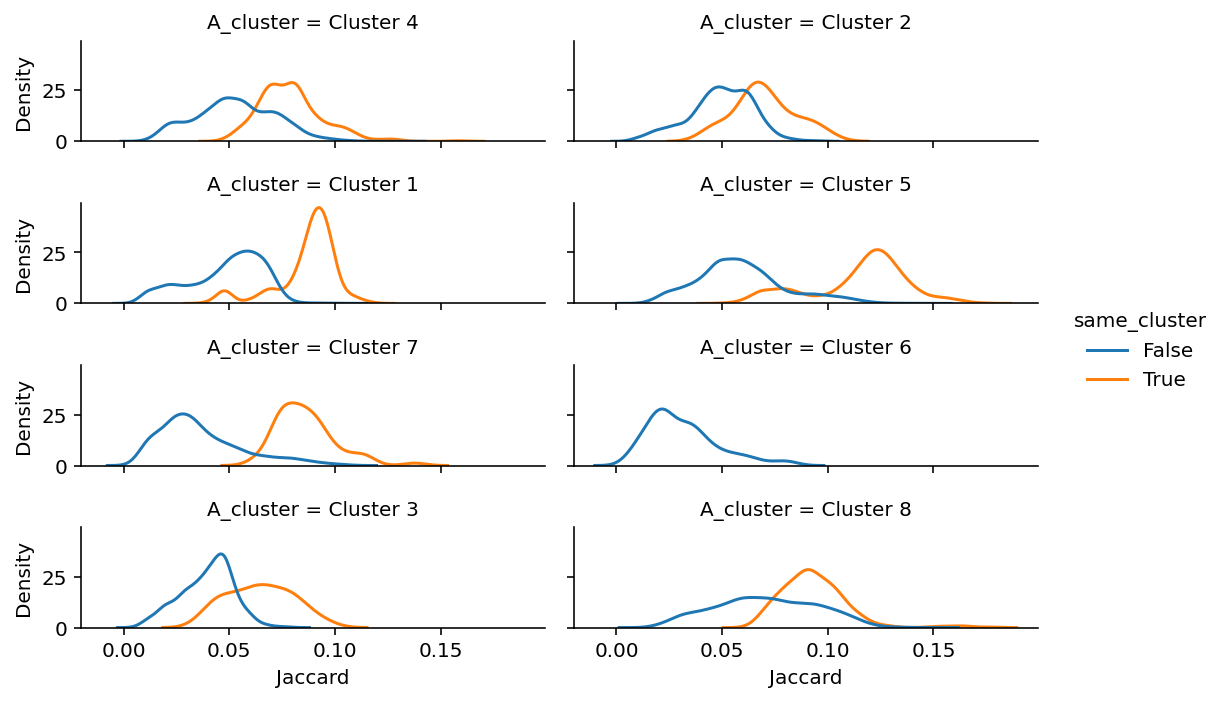

In [79]:
sns.displot(data=heavy_stacked, x='Jaccard', hue='same_cluster', col='A_cluster', col_wrap=2, aspect=3, height=1.25, kind='kde', common_norm=False);

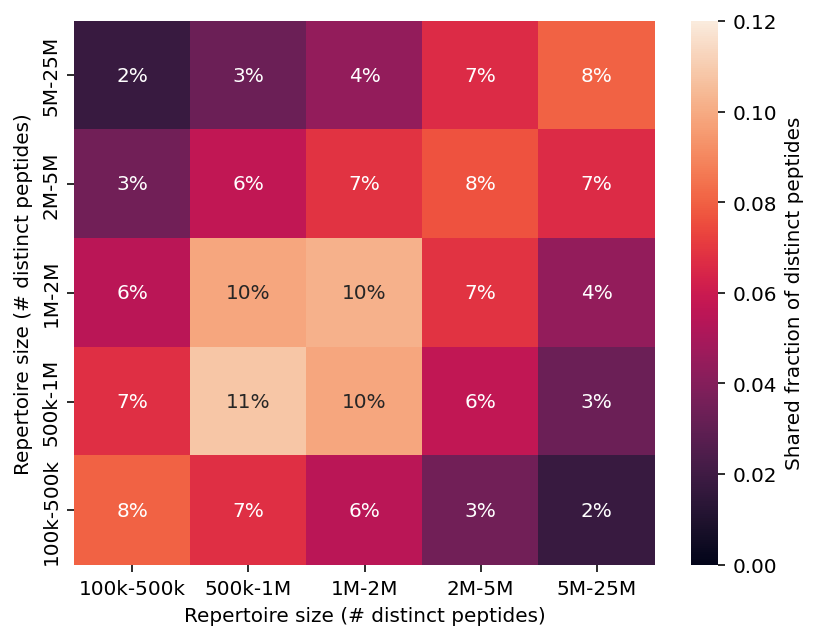

In [114]:
fig, ax = plt.subplots(figsize=(6.5, 5))
mean = heavy_stacked.groupby(['A_bin','B_bin'])['Jaccard'].mean().unstack().loc[size_bins,size_bins].iloc[::-1,:]
ax = sns.heatmap(mean, annot=True, fmt='.0%', vmin=0, vmax=0.12, cbar_kws=dict(label='Shared fraction of distinct peptides'))
ax.set_xlabel('Repertoire size (# distinct peptides)');
ax.set_ylabel('Repertoire size (# distinct peptides)');
ax.set_yticklabels(ax.get_yticklabels(), va='center');

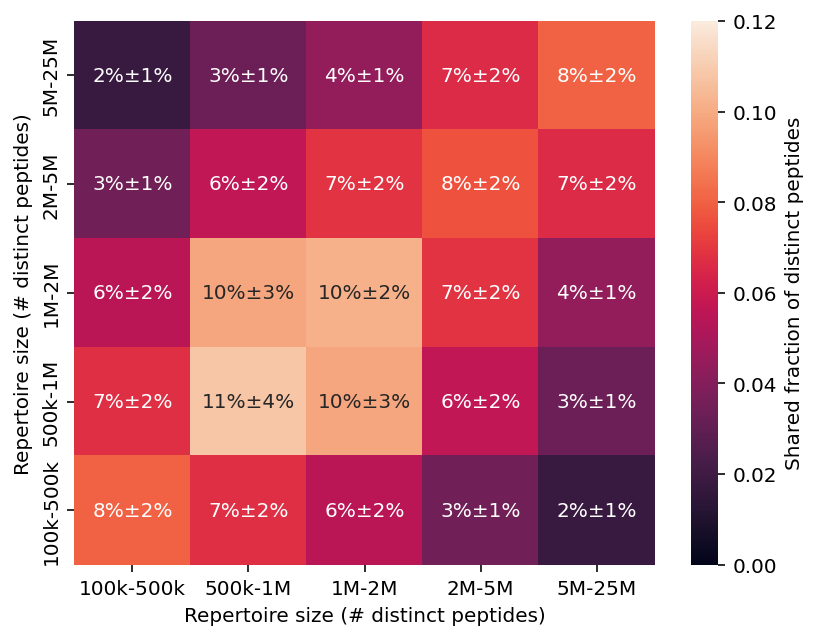

In [113]:
fig, ax = plt.subplots(figsize=(6.5, 5))
mean = heavy_stacked.groupby(['A_bin','B_bin'])['Jaccard'].mean().unstack().loc[size_bins,size_bins].iloc[::-1,:]
std = heavy_stacked.groupby(['A_bin','B_bin'])['Jaccard'].std().unstack().loc[size_bins,size_bins].iloc[::-1,:]
annot = mean.apply(lambda col: col.index.map(lambda i: '{:.0%}±{:.0%}'.format(mean.loc[i, col.name], std.loc[i, col.name])))
ax = sns.heatmap(mean, annot=annot, fmt='s', vmin=0, vmax=0.12, cbar_kws=dict(label='Shared fraction of distinct peptides'))
ax.set_xlabel('Repertoire size (# distinct peptides)');
ax.set_ylabel('Repertoire size (# distinct peptides)');
ax.set_yticklabels(ax.get_yticklabels(), va='center');

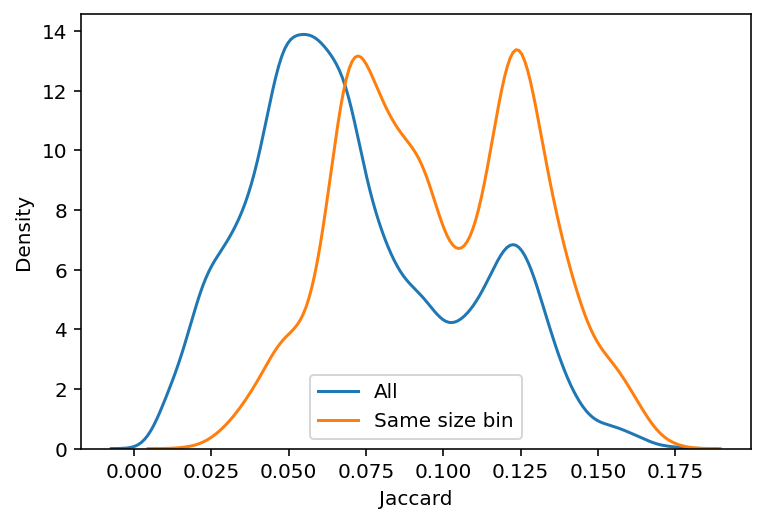

In [90]:
heavy_same_bin = heavy_stacked[heavy_stacked['A_bin'] == heavy_stacked['B_bin']]
ax = sns.kdeplot(data=heavy_stacked, x='Jaccard', label='All');
sns.kdeplot(data=heavy_same_bin, x='Jaccard', label='Same size bin', ax=ax);
ax.legend();

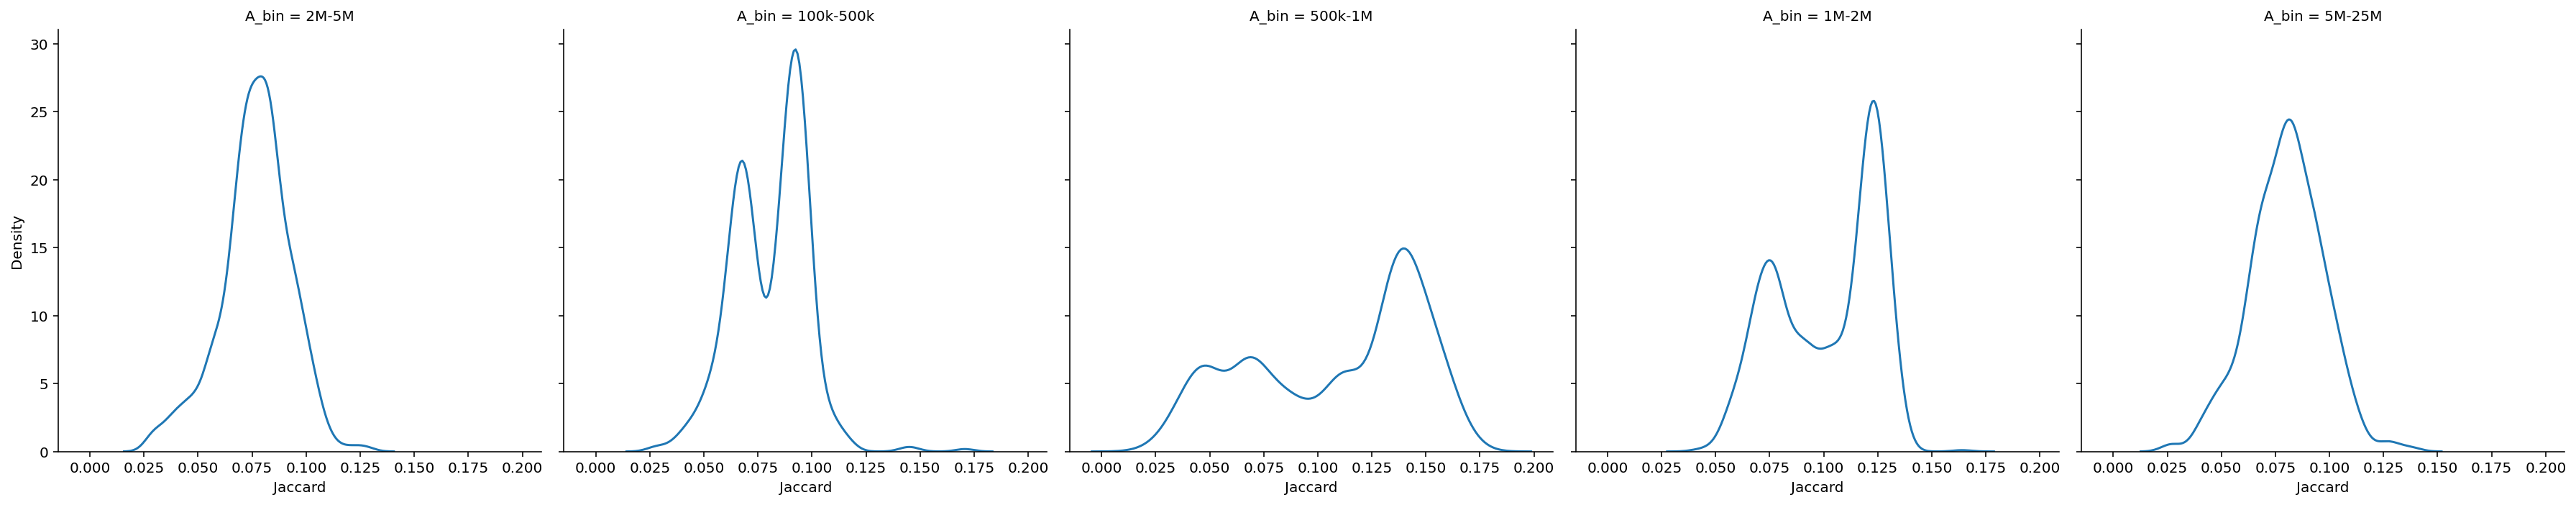

In [91]:
sns.displot(data=heavy_same_bin, x='Jaccard', col='A_bin', kind='kde', common_norm=False);

In [92]:
light_stacked = light_iou.stack().reset_index()
light_stacked.columns = ['A','B','Jaccard']
light_stacked = light_stacked[light_stacked['A'] != light_stacked['B']]
light_stacked['A_peptides'] = subjects.loc[light_stacked['A']]['LightPeptides'].values
light_stacked['B_peptides'] = subjects.loc[light_stacked['B']]['LightPeptides'].values
light_stacked['A_bin'] = light_stacked['A_peptides'].apply(get_bin, bins=size_bins) 
light_stacked['B_bin'] = light_stacked['B_peptides'].apply(get_bin, bins=size_bins) 
light_stacked.head()

A                       B   Jaccard  A_peptides  B_peptides  \
1  Bernat_2019:A007      Bhiman_2015:CAP256  0.058198     1426135      235310   
2  Bernat_2019:A007  Doria-Rose_2015:CAP256  0.133577     1426135     1373970   
3  Bernat_2019:A007          Gidoni_2019:S1  0.098617     1426135      305922   
4  Bernat_2019:A007         Gidoni_2019:S10  0.130930     1426135      585482   
5  Bernat_2019:A007        Gidoni_2019:S100  0.118702     1426135      481995   

   A_bin      B_bin  
1  1M-2M  100k-500k  
2  1M-2M      1M-2M  
3  1M-2M  100k-500k  
4  1M-2M    500k-1M  
5  1M-2M  100k-500k

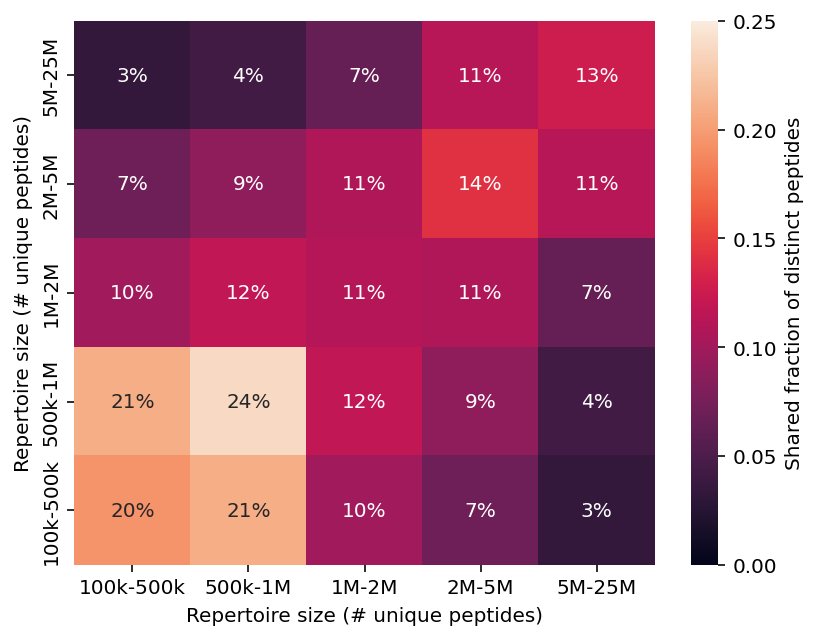

In [108]:
fig, ax = plt.subplots(figsize=(6.5, 5))
mean = light_stacked.groupby(['A_bin','B_bin'])['Jaccard'].mean().unstack().loc[size_bins,size_bins].iloc[::-1,:]
ax = sns.heatmap(mean, annot=True, vmin=0, vmax=0.25, fmt='.0%', cbar_kws=dict(label='Shared fraction of distinct peptides'))
ax.set_xlabel('Repertoire size (# distinct peptides)');
ax.set_ylabel('Repertoire size (# distinct peptides)');
ax.set_yticklabels(ax.get_yticklabels(), va='center');

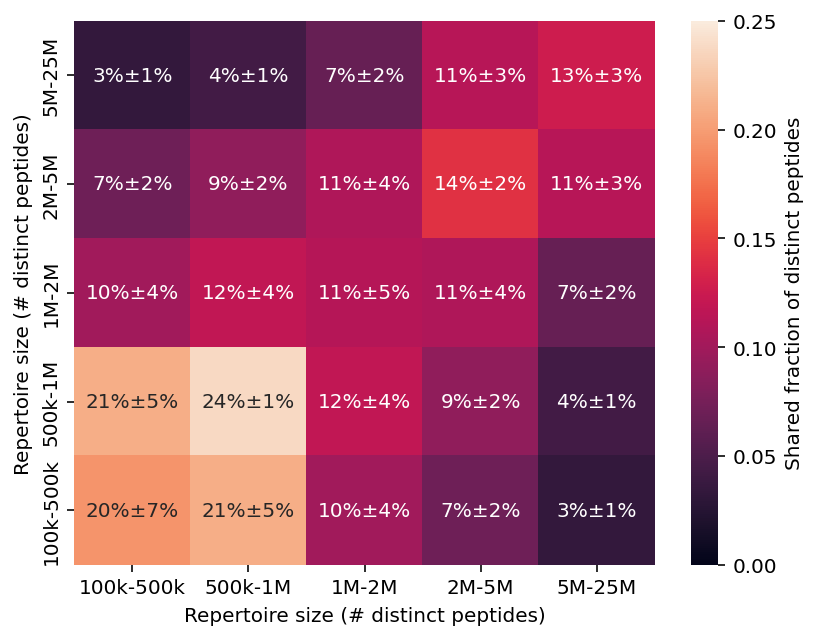

In [112]:
fig, ax = plt.subplots(figsize=(6.5, 5))
mean = light_stacked.groupby(['A_bin','B_bin'])['Jaccard'].mean().unstack().loc[size_bins,size_bins].iloc[::-1,:]
std = light_stacked.groupby(['A_bin','B_bin'])['Jaccard'].std().unstack().loc[size_bins,size_bins].iloc[::-1,:]
annot = mean.apply(lambda col: col.index.map(lambda i: '{:.0%}±{:.0%}'.format(mean.loc[i, col.name], std.loc[i, col.name])))
ax = sns.heatmap(mean, annot=annot, fmt='s', vmin=0, vmax=0.25, cbar_kws=dict(label='Shared fraction of distinct peptides'))
ax.set_xlabel('Repertoire size (# distinct peptides)');
ax.set_ylabel('Repertoire size (# distinct peptides)');
ax.set_yticklabels(ax.get_yticklabels(), va='center');

# Subject (repertoire) similarity UMAP

In [58]:
heavy_similarity = pd.read_csv('../../data/oas_stats/subject_similarity/heavy_weighted_similarity.tsv', sep='\t', index_col=0)
heavy_similarity.head(3)

Bernat_2019:A007  Bhiman_2015:CAP256  \
Subject                                                       
Bernat_2019:A007               1.000000            0.183102   
Bhiman_2015:CAP256             0.183102            1.000000   
Bonsignori_2016:CH505          0.304387            0.247620   

                       Bonsignori_2016:CH505  Corcoran_2016:H1  \
Subject                                                          
Bernat_2019:A007                    0.304387          0.435009   
Bhiman_2015:CAP256                  0.247620          0.157019   
Bonsignori_2016:CH505               1.000000          0.286395   

                       Doria-Rose_2015:CAP256  Eliyahu_2018:C10  \
Subject                                                           
Bernat_2019:A007                     0.360303          0.207641   
Bhiman_2015:CAP256                   0.248248          0.213636   
Bonsignori_2016:CH505                0.383310          0.307266   

                       Eliyahu_2018:C4  Eliyahu_2018:C6  Eliyahu_2018:C7  \
Subject                                                                    
Bernat_2019:A007              0.199775         0.173271         0.225098   
Bhiman_2015:CAP256            0.215490         0.206625         0.234751   
Bonsignori_2016:CH505         0.299875         0.261666         0.317768   

                       Eliyahu_2018:C9  ...  Waltari_2018:MT1214  \
Subject                                 ...                        
Bernat_2019:A007              0.205485  ...             0.348491   
Bhiman_2015:CAP256            0.221120  ...             0.102252   
Bonsignori_2016:CH505         0.301570  ...             0.198470   

                       Waltari_2018:MT8004  Wu_2011:Donor-74  \
Subject                                                        
Bernat_2019:A007                  0.351394          0.190245   
Bhiman_2015:CAP256                0.104695          0.126887   
Bonsignori_2016:CH505             0.206106          0.234232   

                       Wu_2015:Donor-45  Zhou_2015:Donor-44  \
Subject                                                       
Bernat_2019:A007               0.266917            0.172746   
Bhiman_2015:CAP256             0.112235            0.129565   
Bonsignori_2016:CH505          0.251243            0.200857   

                       Zhou_2015:Donor-C38  Zhou_2015:Donor-RU01  \
Subject                                                            
Bernat_2019:A007                  0.183153              0.155316   
Bhiman_2015:CAP256                0.378305              0.132374   
Bonsignori_2016:CH505             0.246685              0.196511   

                       Zhou_2015:Donor-RU08  Zhu_2012:Donor-39  \
Subject                                                          
Bernat_2019:A007                   0.150309           0.220016   
Bhiman_2015:CAP256                 0.129499           0.211536   
Bonsignori_2016:CH505              0.191745           0.311112   

                       Zhu_2013:Donor-C38  
Subject                                    
Bernat_2019:A007                 0.334460  
Bhiman_2015:CAP256               0.176880  
Bonsignori_2016:CH505            0.330094  

[3 rows x 225 columns]

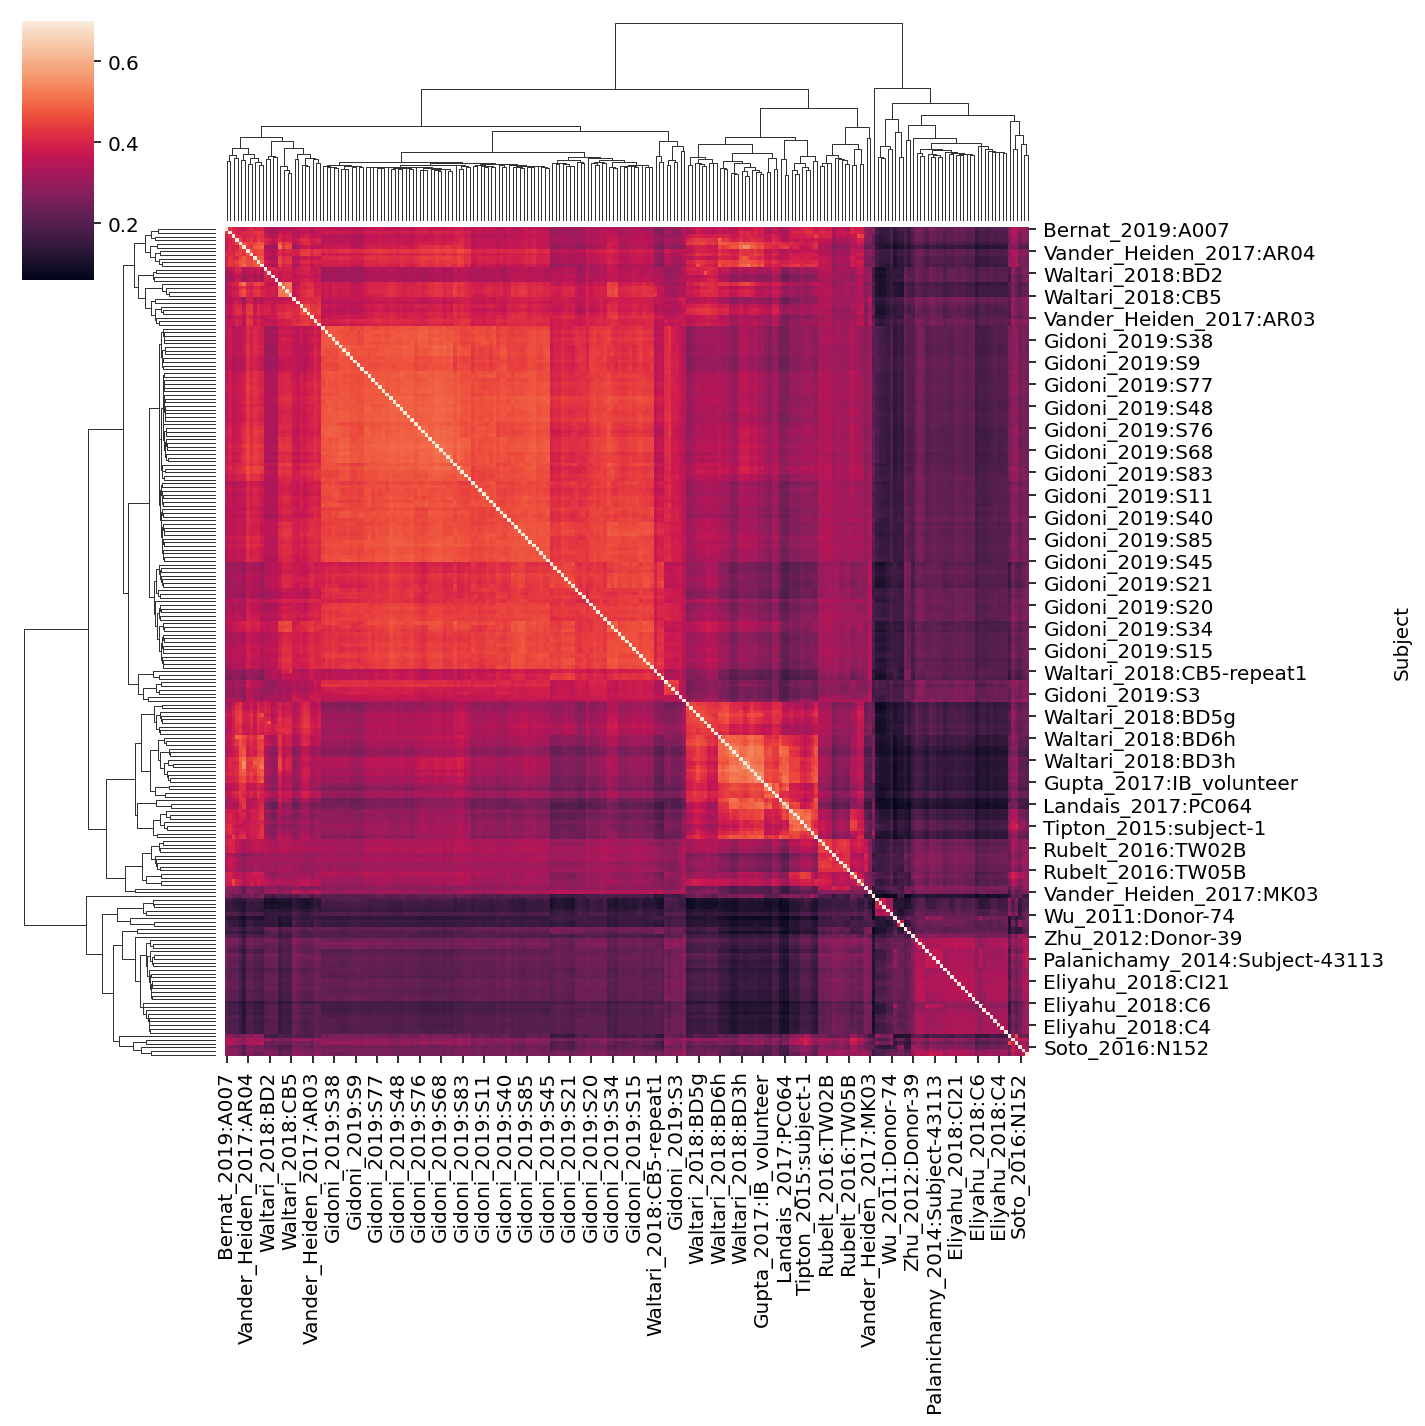

In [82]:
sns.clustermap(heavy_similarity, vmax=0.7);

In [59]:
def fit_umap(df, n_components=2, random_state=0, **kwargs):
    embedding = umap.UMAP(n_components=n_components, random_state=random_state, metric='precomputed', **kwargs).fit_transform(df)
    return pd.DataFrame(embedding, columns=[f'UMAP-{i+1}' for i in range(n_components)], index=df.index)

In [60]:
heavy_subject_umap = fit_umap(heavy_similarity, n_neighbors=15)
heavy_subject_umap = heavy_subject_umap.join(subjects)
heavy_subject_umap['Cluster'] = heavy_clusters
heavy_subject_umap.head(3)

/Users/prihodad/Documents/bioinformatics/projects/oas-humanization/condaenv/lib/python3.8/site-packages/umap/umap_.py:1736: UserWarning: using precomputed metric; transform will be unavailable for new data and inverse_transform will be unavailable for all data
  warn(


UMAP-1    UMAP-2  Index  HeavyPeptides  \
Subject                                                            
Bernat_2019:A007       11.395408  7.127832      1        2696574   
Bhiman_2015:CAP256      9.199449  5.961720      2         362985   
Bonsignori_2016:CH505  12.432923  6.596745      3         911389   

                       LightPeptides  HeavySeqs  LightSeqs  CompleteHeavySeqs  \
Subject                                                                         
Bernat_2019:A007             1426135     423912     315778             390689   
Bhiman_2015:CAP256            235310      73793     114088              64256   
Bonsignori_2016:CH505              0      58841          0              20507   

                       CompleteLightSeqs        StudyPath  ...  \
Subject                                                    ...   
Bernat_2019:A007                  303913      Bernat_2019  ...   
Bhiman_2015:CAP256                108444      Bhiman_2015  ...   
Bonsignori_2016:CH505                  0  Bonsignori_2016  ...   

                                                                    Link  \
Subject                                                                    
Bernat_2019:A007       https://www.frontiersin.org/articles/10.3389/f...   
Bhiman_2015:CAP256          https://www.ncbi.nlm.nih.gov/pubmed/26457756   
Bonsignori_2016:CH505         https://doi.org/10.1016/j.cell.2016.02.022   

                       Year  Age    Disease Vaccine  \
Subject                                               
Bernat_2019:A007       2019   no        NaN     NaN   
Bhiman_2015:CAP256     2015   no        HIV     NaN   
Bonsignori_2016:CH505  2016   no  HIV, None     NaN   

                                            Isotype  \
Subject                                               
Bernat_2019:A007             Bulk, IGHM, IGHG, IGHA   
Bhiman_2015:CAP256     Bulk, IGHG, IGHA, IGHM, IGHE   
Bonsignori_2016:CH505  Bulk, IGHE, IGHG, IGHD, IGHM   

                                                  BType BSource Processed  \
Subject                                                                     
Bernat_2019:A007                       Unsorted-B-Cells    PBMC        no   
Bhiman_2015:CAP256                     Unsorted-B-Cells    PBMC       NaN   
Bonsignori_2016:CH505  Unsorted-B-Cells, Memory-B-Cells    PBMC       NaN   

                         Cluster  
Subject                           
Bernat_2019:A007       Cluster 4  
Bhiman_2015:CAP256     Cluster 2  
Bonsignori_2016:CH505  Cluster 2  

[3 rows x 21 columns]

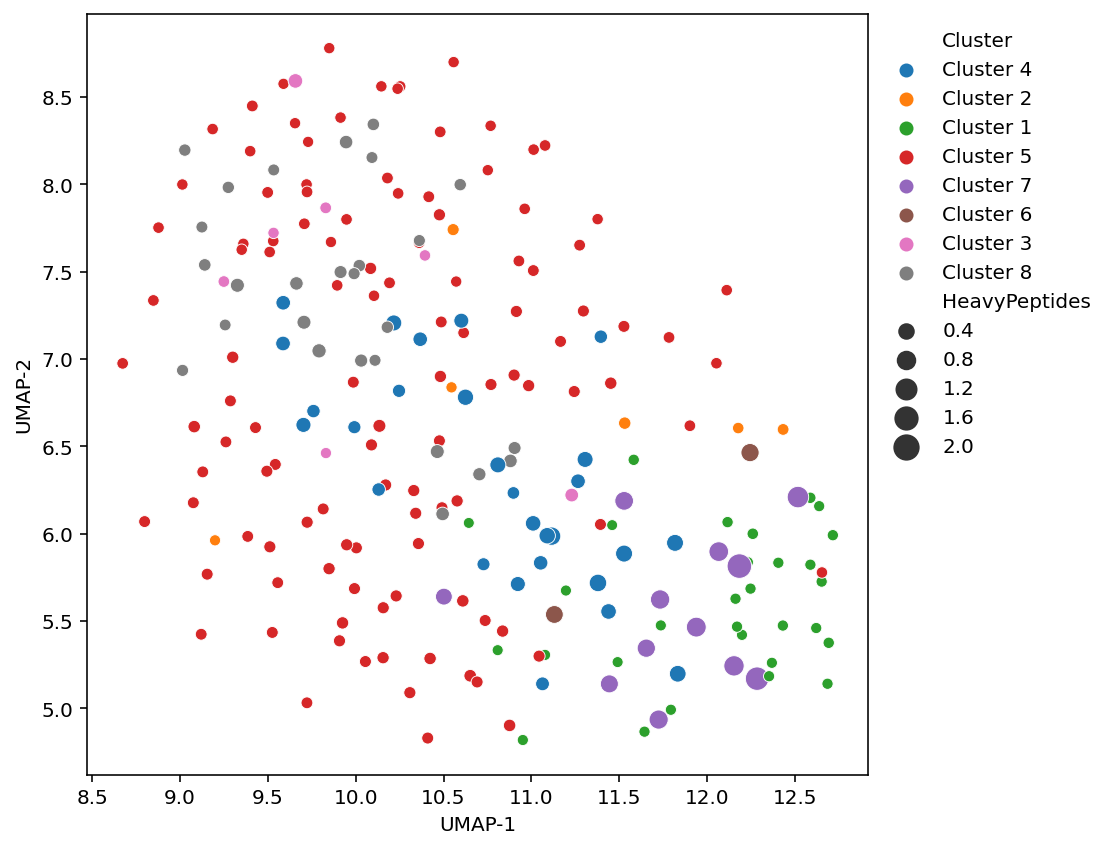

In [61]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.scatterplot(
    data=heavy_subject_umap,
    x='UMAP-1',
    y='UMAP-2',
    hue='Cluster',
    palette='tab10',
    size=heavy_subject_umap['HeavyPeptides'],
    sizes=(30, 150)
);
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=False);

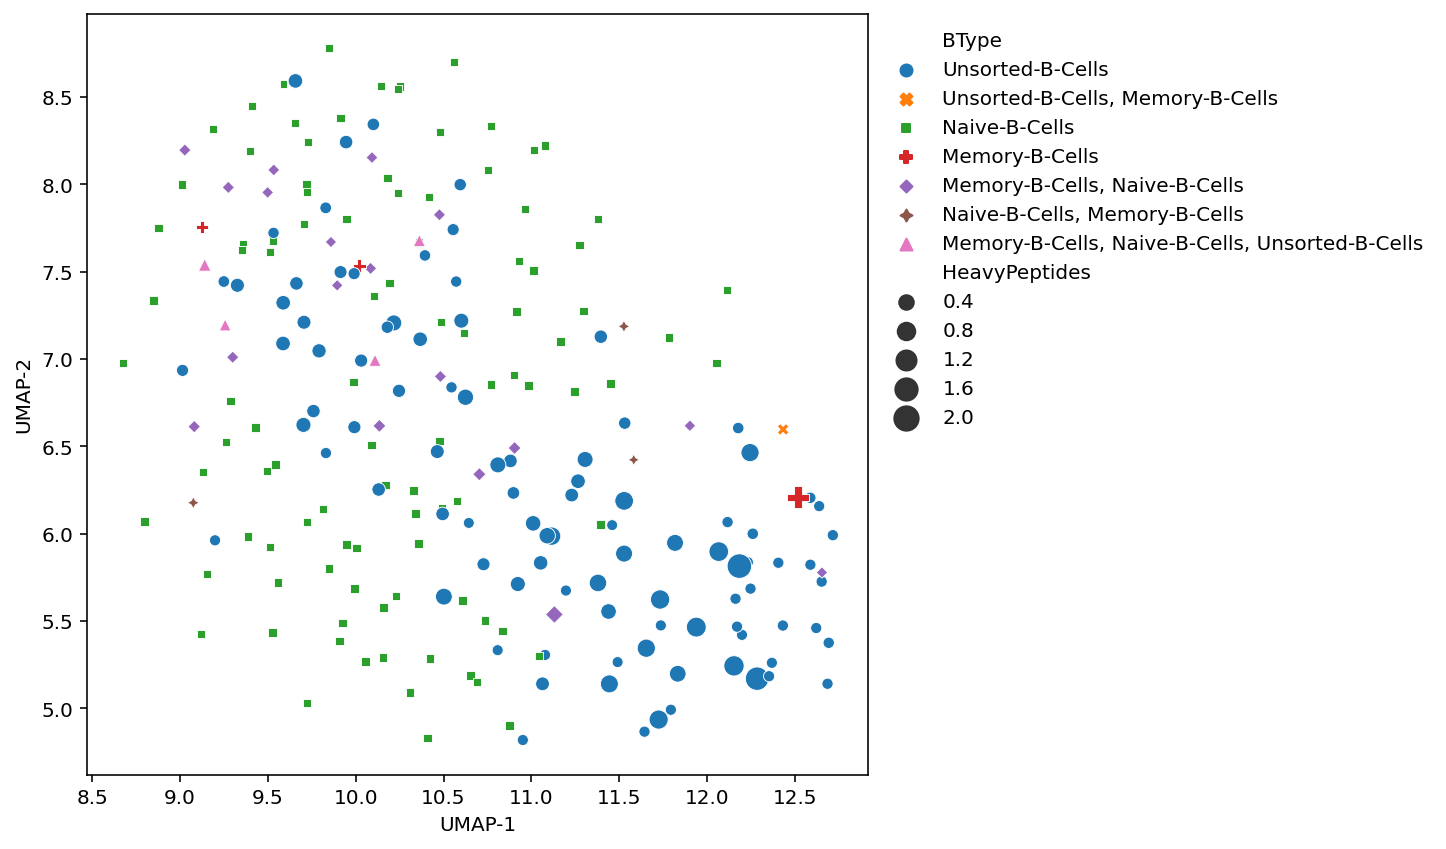

In [62]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.scatterplot(
    data=heavy_subject_umap,
    x='UMAP-1',
    y='UMAP-2',
    style='BType',
    hue='BType',
    palette='tab10',
    size=heavy_subject_umap['HeavyPeptides'],
    sizes=(30, 150)
);
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=False);

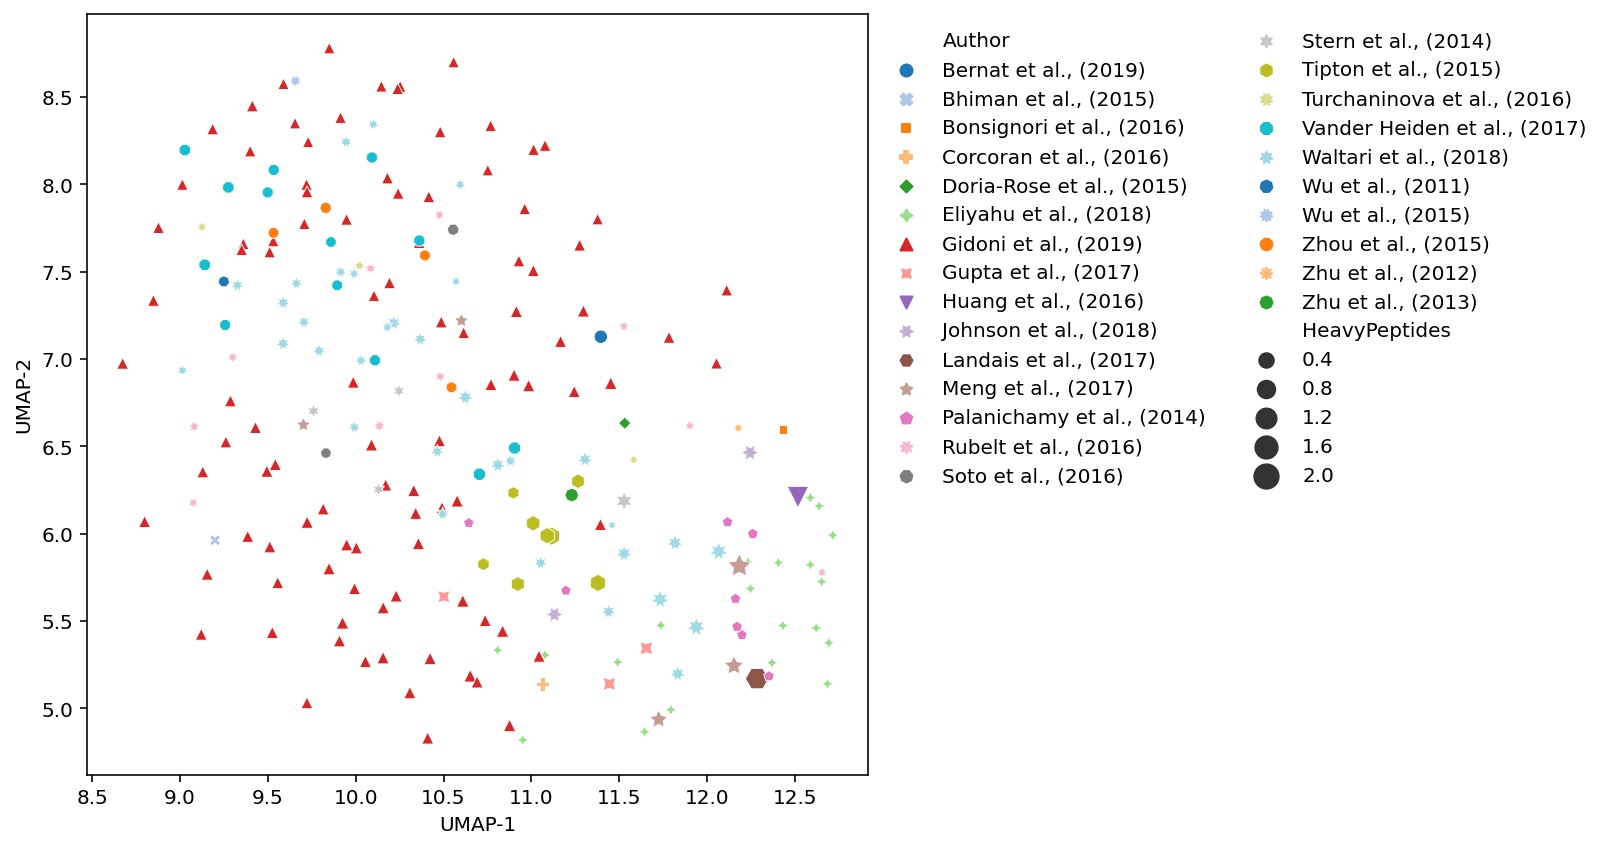

In [63]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.scatterplot(
    data=heavy_subject_umap,
    x='UMAP-1',
    y='UMAP-2',
    hue='Author',
    style='Author',
    palette='tab20',
    size=heavy_subject_umap['HeavyPeptides'],
    sizes=(30, 150)
);
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=2, frameon=False);

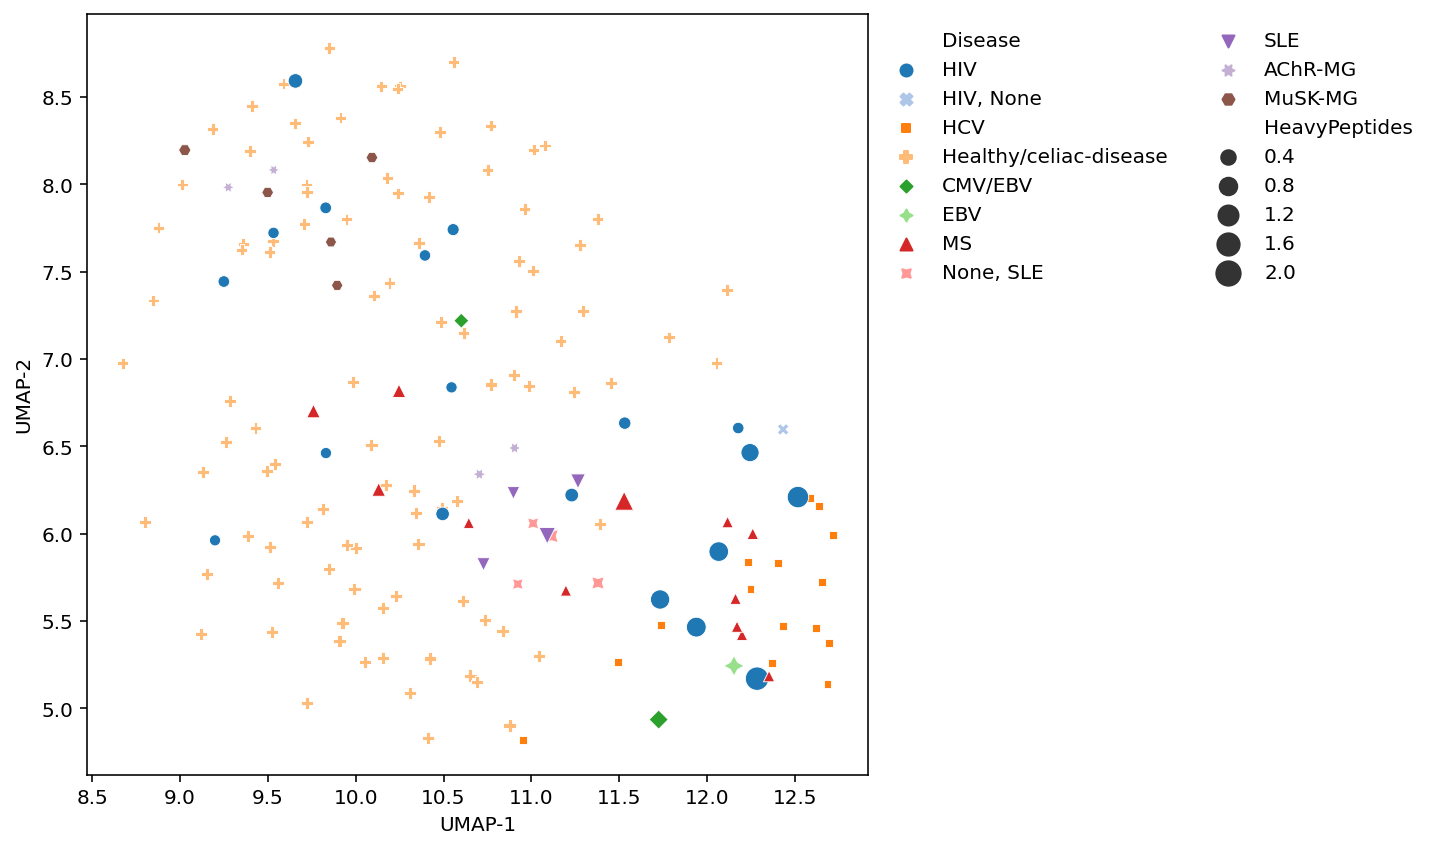

In [64]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.scatterplot(
    data=heavy_subject_umap,
    x='UMAP-1',
    y='UMAP-2',
    hue='Disease',
    style='Disease',
    palette='tab20',
    size=heavy_subject_umap['HeavyPeptides'],
    sizes=(30, 150)
);
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=2, frameon=False);

In [65]:
light_similarity = pd.read_csv('../../data/oas_stats/subject_similarity/light_weighted_similarity.tsv', sep='\t', index_col=0)
light_similarity.head(3)

Bernat_2019:A007  Bhiman_2015:CAP256  \
Subject                                                        
Bernat_2019:A007                1.000000            0.162214   
Bhiman_2015:CAP256              0.162214            1.000000   
Doria-Rose_2015:CAP256          0.423171            0.227495   

                        Doria-Rose_2015:CAP256  Gidoni_2019:S1  \
Subject                                                          
Bernat_2019:A007                      0.423171        0.348522   
Bhiman_2015:CAP256                    0.227495        0.178556   
Doria-Rose_2015:CAP256                1.000000        0.332172   

                        Gidoni_2019:S10  Gidoni_2019:S100  Gidoni_2019:S11  \
Subject                                                                      
Bernat_2019:A007               0.427340          0.402315         0.399830   
Bhiman_2015:CAP256             0.154435          0.143233         0.149564   
Doria-Rose_2015:CAP256         0.348802          0.320244         0.327125   

                        Gidoni_2019:S12  Gidoni_2019:S13  Gidoni_2019:S14  \
Subject                                                                     
Bernat_2019:A007               0.417654         0.415886         0.376688   
Bhiman_2015:CAP256             0.148688         0.145838         0.140587   
Doria-Rose_2015:CAP256         0.339289         0.332754         0.301579   

                        ...  Waltari_2018:MT8004  Wu_2011:Donor-45  \
Subject                 ...                                          
Bernat_2019:A007        ...             0.338772          0.094570   
Bhiman_2015:CAP256      ...             0.081079          0.009915   
Doria-Rose_2015:CAP256  ...             0.286339          0.116097   

                        Wu_2015:Donor-45  Zhou_2013:Donor-IAVI23  \
Subject                                                            
Bernat_2019:A007                0.257934                0.216369   
Bhiman_2015:CAP256              0.014316                0.102991   
Doria-Rose_2015:CAP256          0.278889                0.251169   

                        Zhou_2013:Donor-IAVI57  Zhou_2013:Donor-IAVI74  \
Subject                                                                  
Bernat_2019:A007                      0.167994                0.314414   
Bhiman_2015:CAP256                    0.014059                0.182579   
Doria-Rose_2015:CAP256                0.193333                0.386216   

                        Zhou_2013:Donor-NIAID45  Zhou_2013:Donor-RU3  \
Subject                                                                
Bernat_2019:A007                       0.126715             0.232004   
Bhiman_2015:CAP256                     0.010227             0.014534   
Doria-Rose_2015:CAP256                 0.153229             0.268991   

                        Zhu_2012:Donor-39  Zhu_2013:Donor-C38  
Subject                                                        
Bernat_2019:A007                 0.164529            0.408221  
Bhiman_2015:CAP256               0.012437            0.198363  
Doria-Rose_2015:CAP256           0.198214            0.511391  

[3 rows x 154 columns]

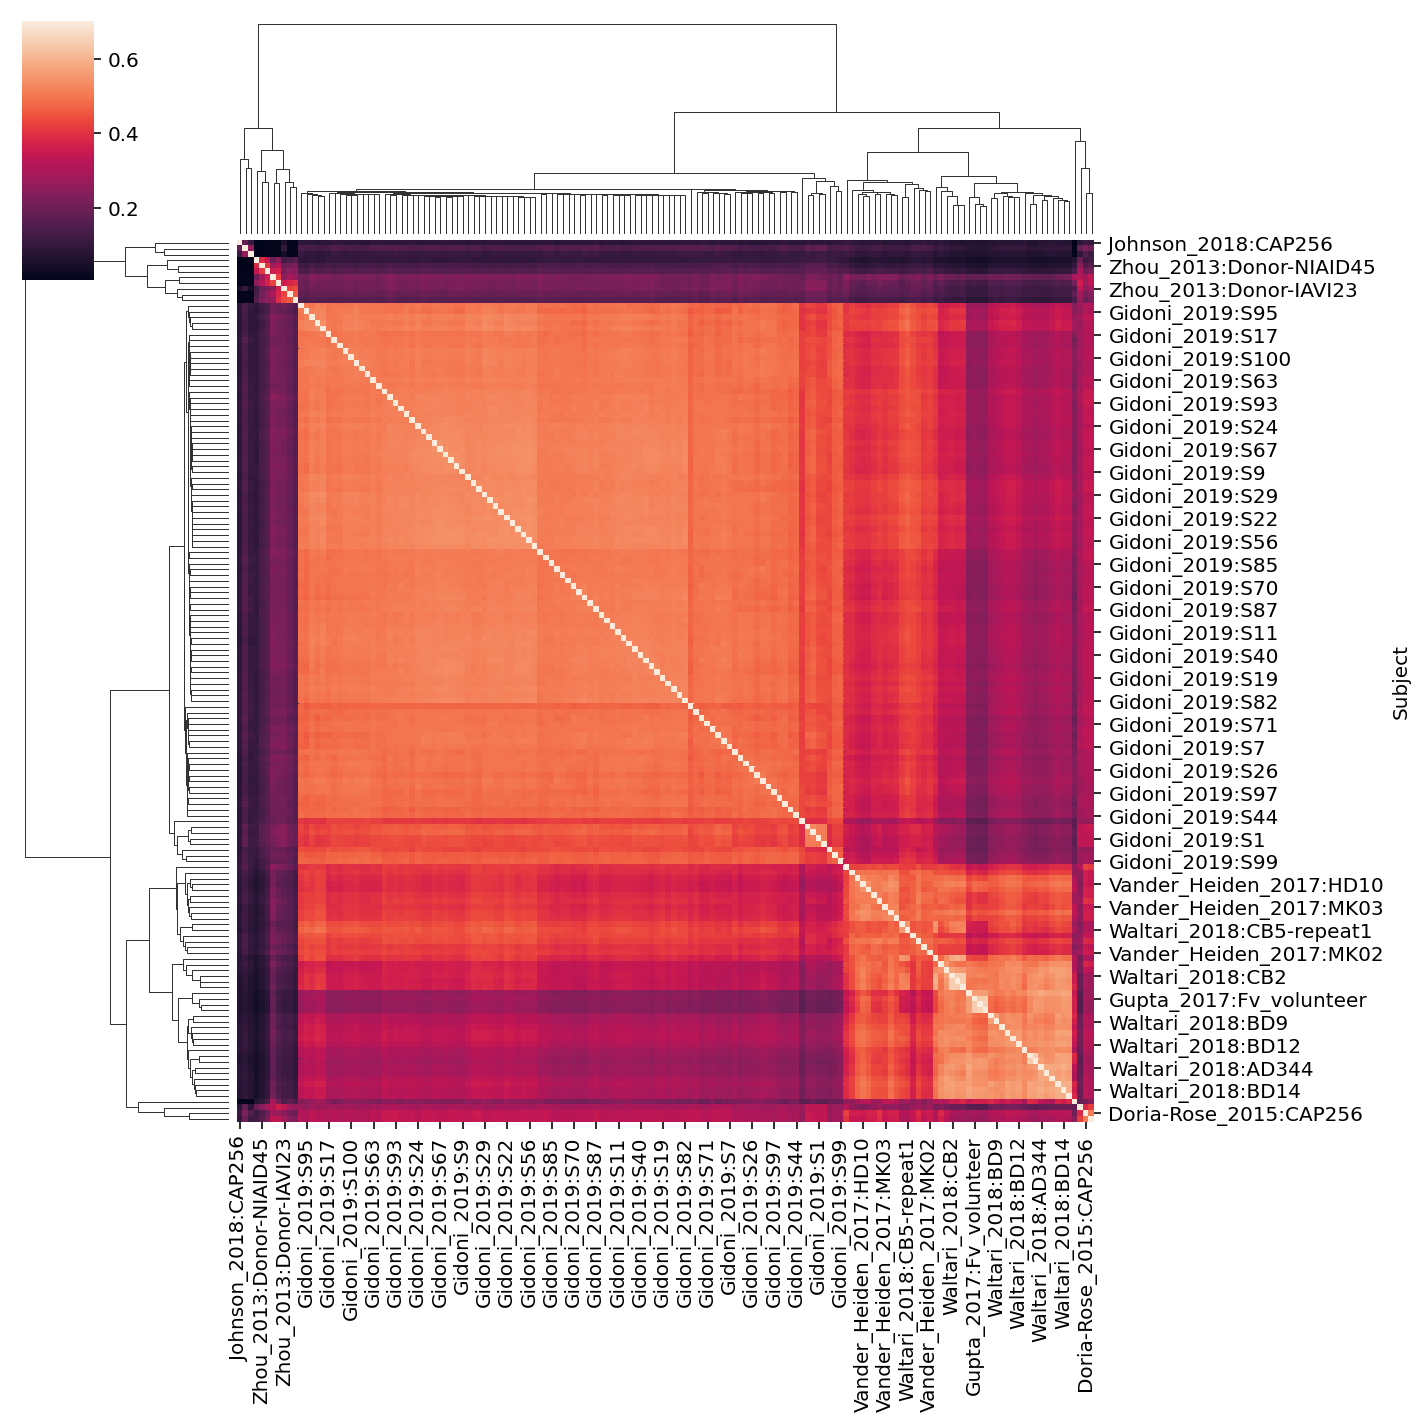

In [83]:
sns.clustermap(light_similarity, vmax=0.7);

In [66]:
light_subject_umap = fit_umap(light_similarity, n_neighbors=5)
light_subject_umap = light_subject_umap.join(subjects)
light_subject_umap.head(3)

/Users/prihodad/Documents/bioinformatics/projects/oas-humanization/condaenv/lib/python3.8/site-packages/umap/umap_.py:1736: UserWarning: using precomputed metric; transform will be unavailable for new data and inverse_transform will be unavailable for all data
  warn(


UMAP-1    UMAP-2  Index  HeavyPeptides  \
Subject                                                             
Bernat_2019:A007        11.532578  9.126377      1        2696574   
Bhiman_2015:CAP256      10.926695  7.898624      2         362985   
Doria-Rose_2015:CAP256  13.386274  7.813264      5        1586970   

                        LightPeptides  HeavySeqs  LightSeqs  \
Subject                                                       
Bernat_2019:A007              1426135     423912     315778   
Bhiman_2015:CAP256             235310      73793     114088   
Doria-Rose_2015:CAP256        1373970     168151     389774   

                        CompleteHeavySeqs  CompleteLightSeqs        StudyPath  \
Subject                                                                         
Bernat_2019:A007                   390689             303913      Bernat_2019   
Bhiman_2015:CAP256                  64256             108444      Bhiman_2015   
Doria-Rose_2015:CAP256             117664             371998  Doria-Rose_2015   

                                           Author  \
Subject                                             
Bernat_2019:A007            Bernat et al., (2019)   
Bhiman_2015:CAP256          Bhiman et al., (2015)   
Doria-Rose_2015:CAP256  Doria-Rose et al., (2015)   

                                                                     Link  \
Subject                                                                     
Bernat_2019:A007        https://www.frontiersin.org/articles/10.3389/f...   
Bhiman_2015:CAP256           https://www.ncbi.nlm.nih.gov/pubmed/26457756   
Doria-Rose_2015:CAP256        https://www.nature.com/articles/nature13036   

                        Year Age Disease Vaccine  \
Subject                                            
Bernat_2019:A007        2019  no     NaN     NaN   
Bhiman_2015:CAP256      2015  no     HIV     NaN   
Doria-Rose_2015:CAP256  2015  no     HIV     NaN   

                                                   Isotype             BType  \
Subject                                                                        
Bernat_2019:A007                    Bulk, IGHM, IGHG, IGHA  Unsorted-B-Cells   
Bhiman_2015:CAP256            Bulk, IGHG, IGHA, IGHM, IGHE  Unsorted-B-Cells   
Doria-Rose_2015:CAP256  Bulk, IGHG, IGHM, IGHE, IGHA, IGHD  Unsorted-B-Cells   

                       BSource Processed  
Subject                                   
Bernat_2019:A007          PBMC        no  
Bhiman_2015:CAP256        PBMC       NaN  
Doria-Rose_2015:CAP256    PBMC       NaN

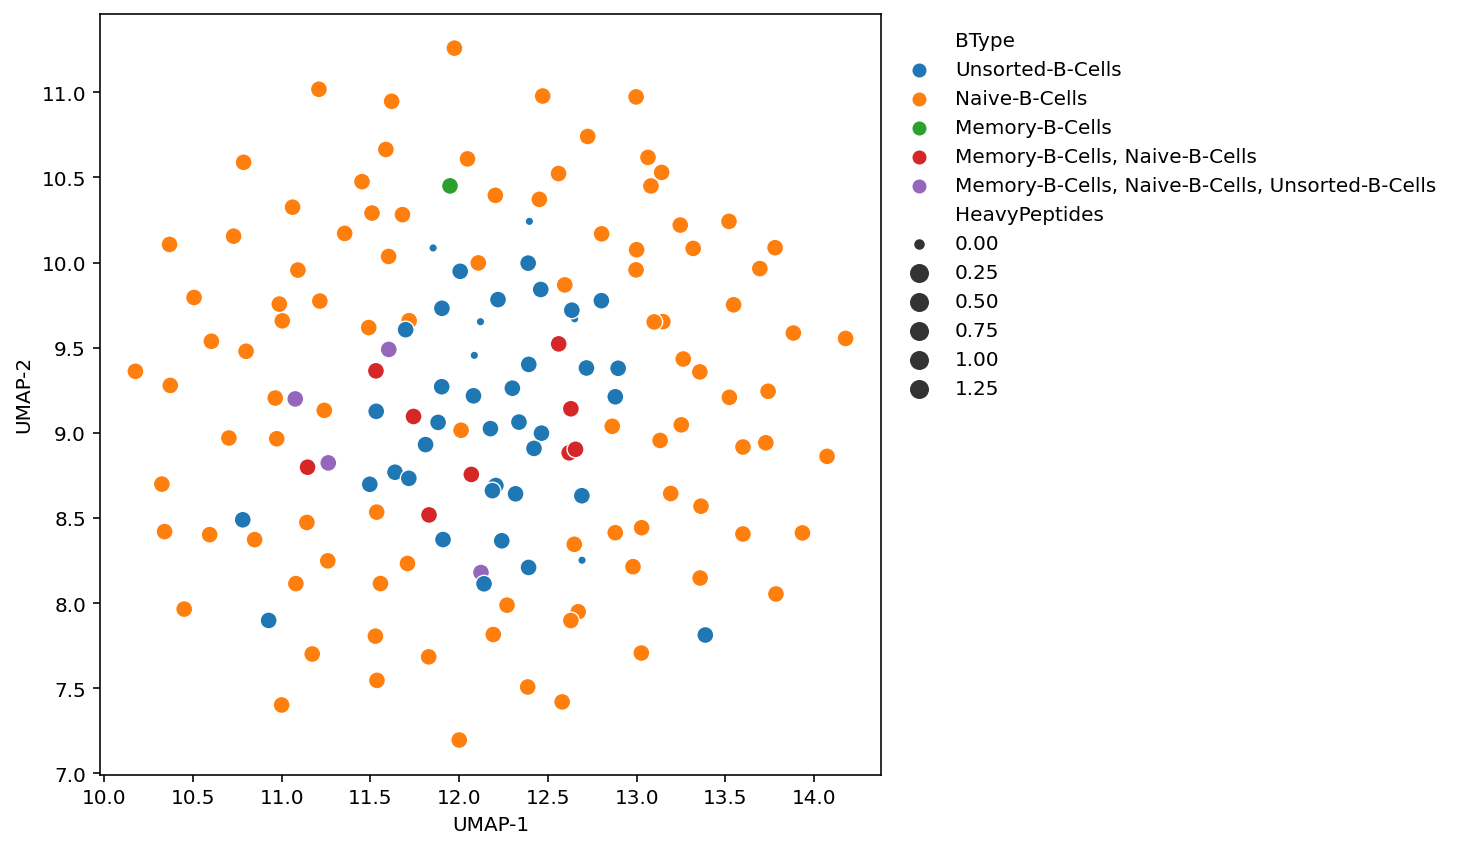

In [67]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.scatterplot(
    data=light_subject_umap,
    x='UMAP-1',
    y='UMAP-2',
    hue='BType',
    palette='tab10',
    size=light_subject_umap['HeavyPeptides'],
    size_norm=(1, 200000)
);
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=False);

In [68]:
shared_index = heavy_similarity.index[heavy_similarity.index.isin(light_similarity.index)]
mean_similarity = (heavy_similarity.loc[shared_index,shared_index] + light_similarity.loc[shared_index,shared_index]) / 2

In [69]:
mean_umap = fit_umap(mean_similarity, n_neighbors=5)
mean_umap = mean_umap.join(subjects)
mean_umap.head(3)

/Users/prihodad/Documents/bioinformatics/projects/oas-humanization/condaenv/lib/python3.8/site-packages/umap/umap_.py:1736: UserWarning: using precomputed metric; transform will be unavailable for new data and inverse_transform will be unavailable for all data
  warn(


UMAP-1    UMAP-2  Index  HeavyPeptides  \
Subject                                                            
Bernat_2019:A007        4.702079  1.047081      1        2696574   
Bhiman_2015:CAP256      4.415616  0.940056      2         362985   
Doria-Rose_2015:CAP256  1.940727  3.275353      5        1586970   

                        LightPeptides  HeavySeqs  LightSeqs  \
Subject                                                       
Bernat_2019:A007              1426135     423912     315778   
Bhiman_2015:CAP256             235310      73793     114088   
Doria-Rose_2015:CAP256        1373970     168151     389774   

                        CompleteHeavySeqs  CompleteLightSeqs        StudyPath  \
Subject                                                                         
Bernat_2019:A007                   390689             303913      Bernat_2019   
Bhiman_2015:CAP256                  64256             108444      Bhiman_2015   
Doria-Rose_2015:CAP256             117664             371998  Doria-Rose_2015   

                                           Author  \
Subject                                             
Bernat_2019:A007            Bernat et al., (2019)   
Bhiman_2015:CAP256          Bhiman et al., (2015)   
Doria-Rose_2015:CAP256  Doria-Rose et al., (2015)   

                                                                     Link  \
Subject                                                                     
Bernat_2019:A007        https://www.frontiersin.org/articles/10.3389/f...   
Bhiman_2015:CAP256           https://www.ncbi.nlm.nih.gov/pubmed/26457756   
Doria-Rose_2015:CAP256        https://www.nature.com/articles/nature13036   

                        Year Age Disease Vaccine  \
Subject                                            
Bernat_2019:A007        2019  no     NaN     NaN   
Bhiman_2015:CAP256      2015  no     HIV     NaN   
Doria-Rose_2015:CAP256  2015  no     HIV     NaN   

                                                   Isotype             BType  \
Subject                                                                        
Bernat_2019:A007                    Bulk, IGHM, IGHG, IGHA  Unsorted-B-Cells   
Bhiman_2015:CAP256            Bulk, IGHG, IGHA, IGHM, IGHE  Unsorted-B-Cells   
Doria-Rose_2015:CAP256  Bulk, IGHG, IGHM, IGHE, IGHA, IGHD  Unsorted-B-Cells   

                       BSource Processed  
Subject                                   
Bernat_2019:A007          PBMC        no  
Bhiman_2015:CAP256        PBMC       NaN  
Doria-Rose_2015:CAP256    PBMC       NaN

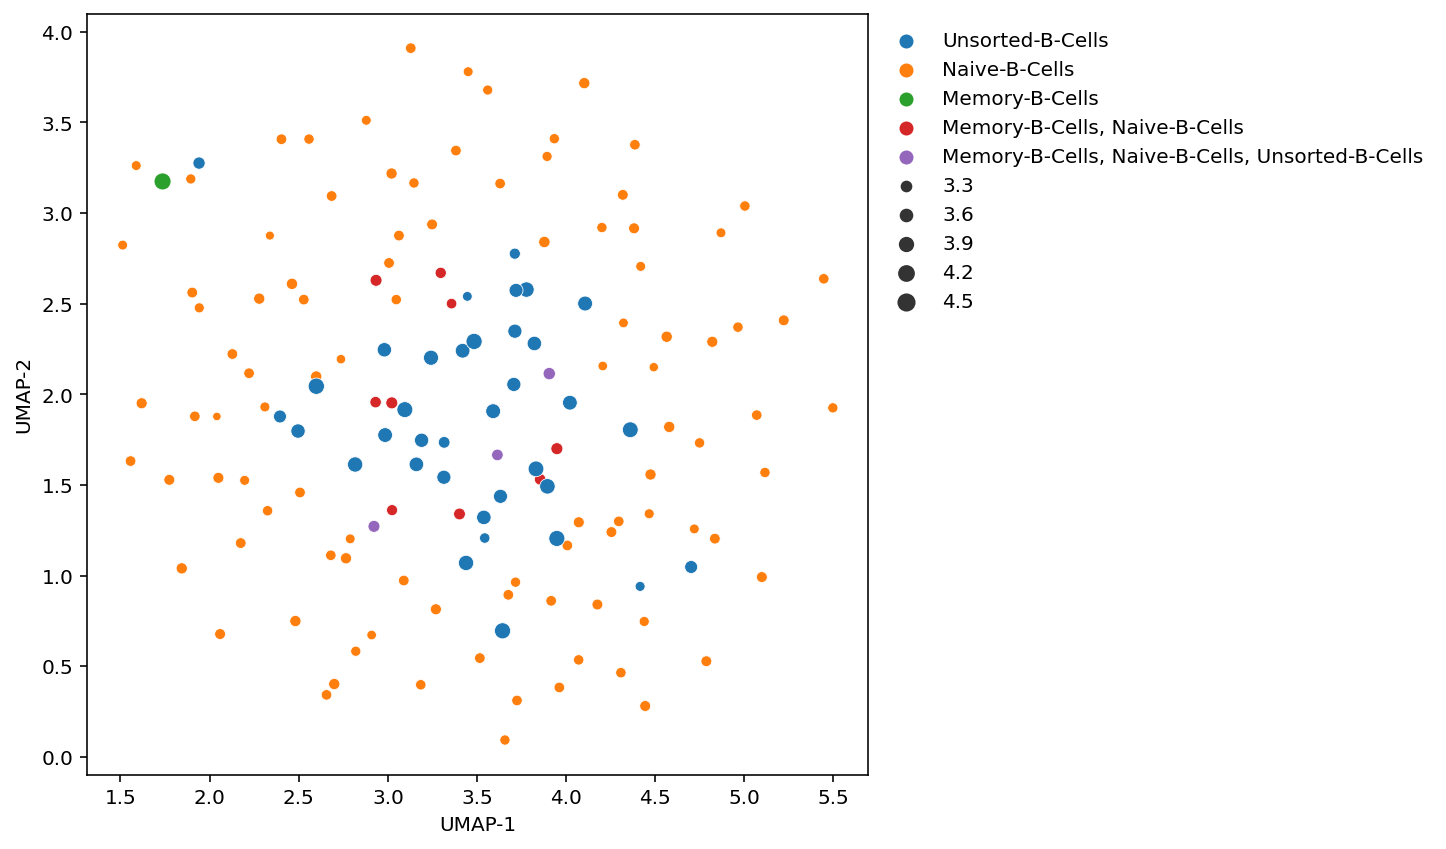

In [70]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.scatterplot(
    data=mean_umap,
    x='UMAP-1',
    y='UMAP-2',
    hue='BType',
    palette='tab10',
    size=np.power(mean_umap['CompleteHeavySeqs']+mean_umap['CompleteLightSeqs'], 0.1)
);
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=False);